# <div align = 'center'> Econometría Financiera </div>
## <div align = 'center'> Examen Final </div>
<div align = 'left'>
      <font color = 'black' size = 4>
        <strong>Ciencias Administrativas - Universidad Nacional Mayor de San Marcos <br>
        Econometría Financiera<br>
        Semestre 2021-I<br>
        Septiembre 2021<br>
        Profesor: Fritz Sierra Tintaya<br>
          </font>
        </div>

#### Nombres y Apellidos:

<div align = 'left'>
      <font color = 'green' size = 3>
        <strong>Erika Zully Contreras Manturano <br>
                </font>

### 1. Modelo Arima
Utilizando la serie del BCRP del Tipo de cambio - promedio del periodo (S/ por US$) - Interbancario - Compra (PN01205PM) desde 1994 hasta el presente, estimar un modelo ```Arima``` que mejor se ajuste a los datos y realizar una proyección del Tipo de Cambio. Y analizar los resultados obtenidos.

In [95]:
# pip install mplcyberpunk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # gráficos
# Se usan para realizar el web scraping
import requests
import time
from io import StringIO
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# Una mejor vizualización de los datos
import mplcyberpunk
plt.style.use("cyberpunk")
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [96]:
base_datos = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01205PM/csv/1994-1/2021-9"
content = requests.get(base_datos,verify=False).text.replace("<br>","\n").strip()
content
csv =  StringIO(content)
serie_94_21= pd.read_csv(csv)
serie_94_21.columns = ['date', 'value']
serie_94_21

,date,value
0,Ago.1994,2.228682
1,Sep.1994,2.250500
2,Oct.1994,2.228857
3,Nov.1994,2.185762
4,Dic.1994,2.127857
...,...,...
320,Abr.2021,3.697590
321,May.2021,3.770971
322,Jun.2021,3.904743
323,Jul.2021,3.938600


Text(0.5, 1.0, 'Serie Original- Tipo de cambio')

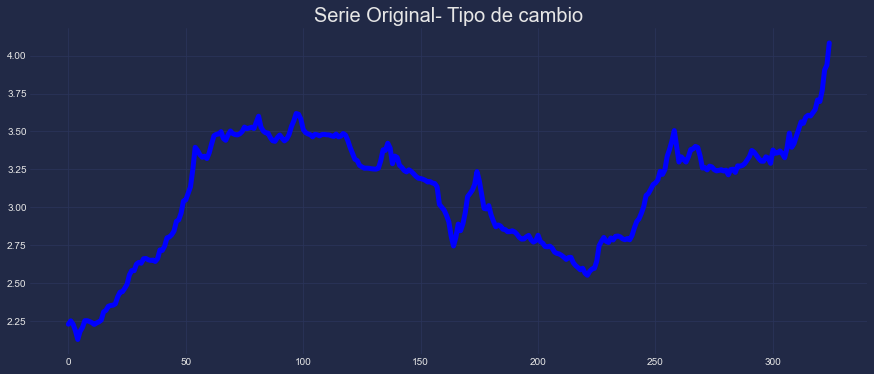

In [98]:
plt.figure(figsize=(15,6))
# Serie Original
plt.plot(serie_94_21.value,lw=5, c='b')
plt.title("Serie Original- Tipo de cambio", fontsize=20)

Hacemos la prueba de ```Augmented Dickey Fuller()``` para proba estacionalidad

In [100]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
resultado = adfuller(serie_94_21.value.dropna())
print('ADF Statistic: %f' % resultado[0])
print('p-value: %f' % resultado[1])

ADF Statistic: -1.085252
p-value: 0.720917


Como el valor ```P-value = 0.720917``` es mayor que el nivel de significancia, tenemos que diferenciar la serie y veremos cómo se ve el gráfico de autocorrelación.

Por lo tanto no se rechaza la hipotesis nula , es decir es no estacionaria...

En esta ocaciòn haremos dos diferencias para revisar como nos da la autocorrelación y luego volver a realizar la **Prueba Dickey-Fuller**

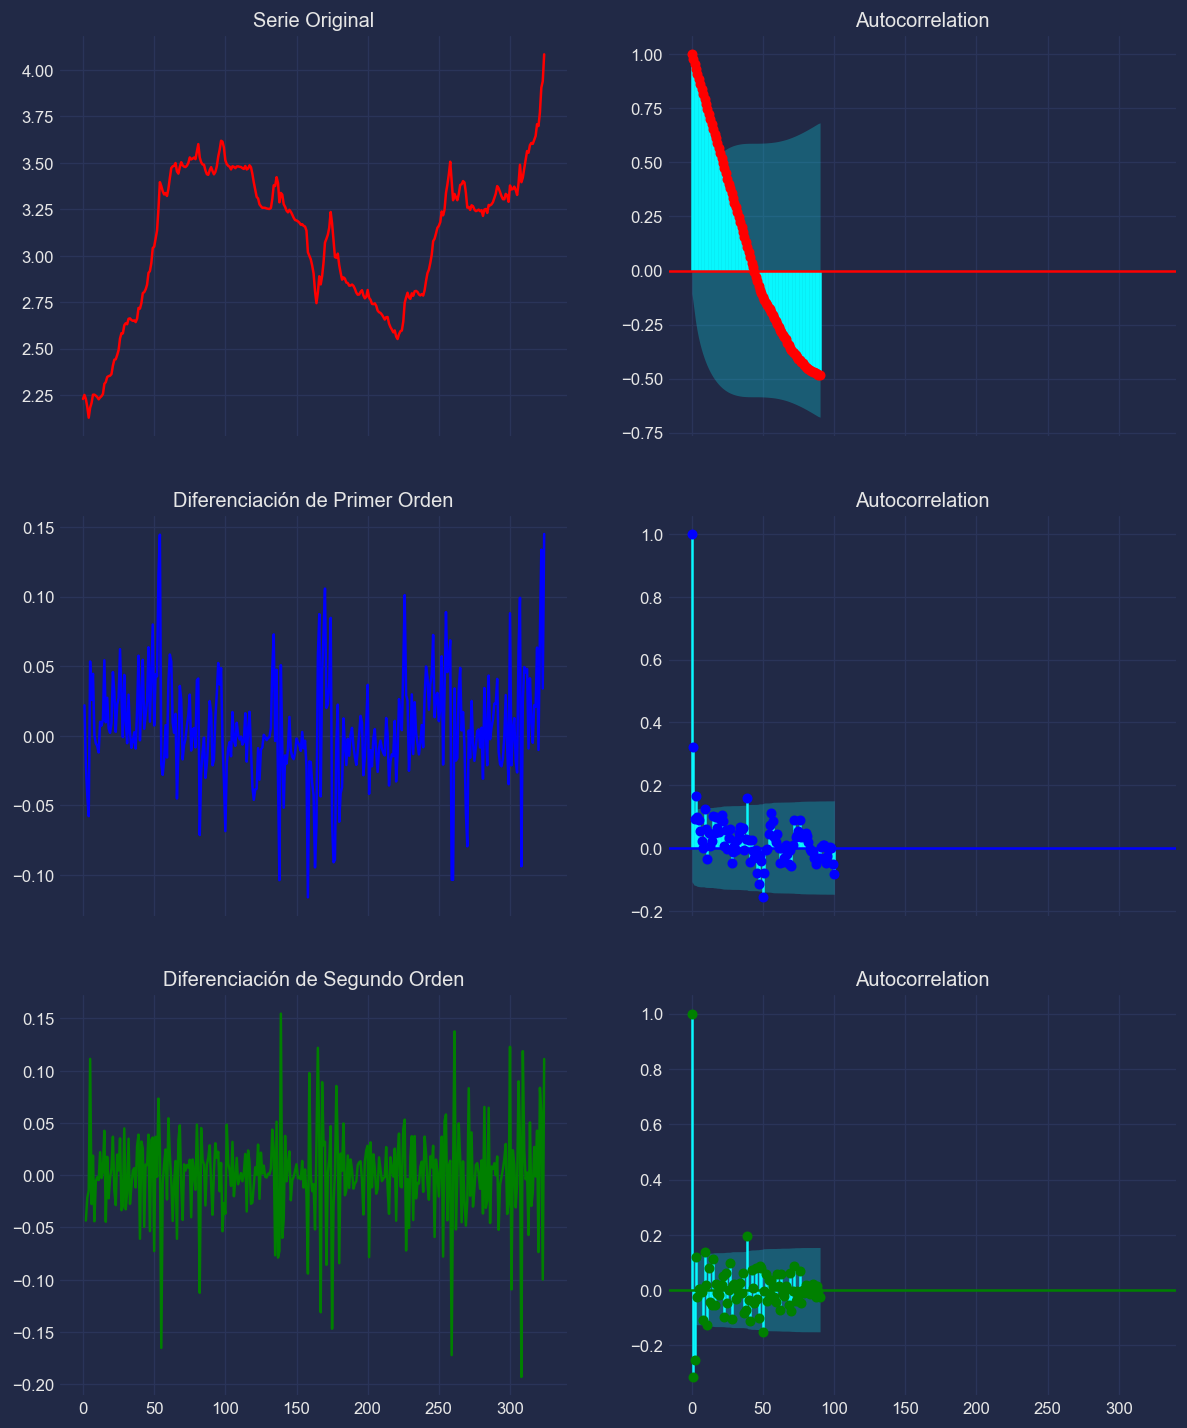

In [27]:
plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})
# Serie Original
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(serie_94_21.value, c='r'); axes[0, 0].set_title('Serie Original')
plot_acf(serie_94_21.value, ax=axes[0, 1], lags=90, c='r')

# 1ra Diferencia
axes[1, 0].plot(serie_94_21.value.diff(), c='b'); axes[1, 0].set_title('Diferenciación de Primer Orden')
plot_acf(serie_94_21.value.diff().dropna(), ax=axes[1, 1], lags=100, c='b')

# 2nda Diferencia
axes[2, 0].plot(serie_94_21.value.diff().diff(), c='g'); axes[2, 0].set_title('Diferenciación de Segundo Orden')
plot_acf(serie_94_21.value.diff().diff().dropna(), ax=axes[2, 1], lags=90, c='g')

plt.show()

Se puede decir que la serie  alcanza la estacionariedad con 1 orden de diferenciación pero con dos órdenes de diferenciación se ajusta mejor. 
Por lo tanto, se va a tomar el orden de diferenciación como 1 aunque la serie no sea perfectamente estacionaria (estacionariedad débil).


In [101]:
#Segunda prueba con los datos diferenciados1 vez
from statsmodels.tsa.stattools import adfuller
primera_diferenciacion = adfuller(serie_94_21.value.diff().dropna())
print('1ra Diferencia')
print('ADF Statistic: %f' % primera_diferenciacion[0])
print('p-value: %f' % primera_diferenciacion[1])


##EL MODELO YA ES ESTACIONARIO CON EL VALOR DE 1 
#RECHAZAMOS LA HIPOTESIS NULA 

1ra Diferencia
ADF Statistic: -7.026051
p-value: 0.000000


El valor de $d=1$

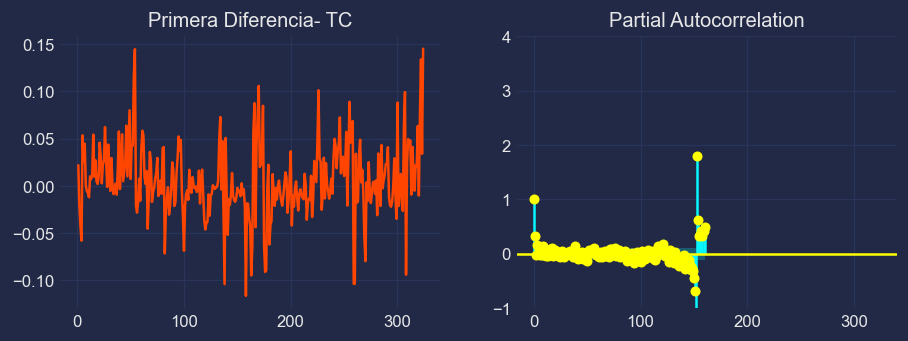

In [109]:
#Encontrando el orden del término AR (p)
# Gráfico PACF de la  1st diferencia de la serie
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(serie_94_21.value.diff().dropna(), c='orangered'); axes[0].set_title('Primera Diferencia- TC')
axes[1].set(ylim=(-1,4))
plot_pacf(serie_94_21.value.diff().dropna(), c='YELLOW',ax=axes[1], lags=160)

plt.show()

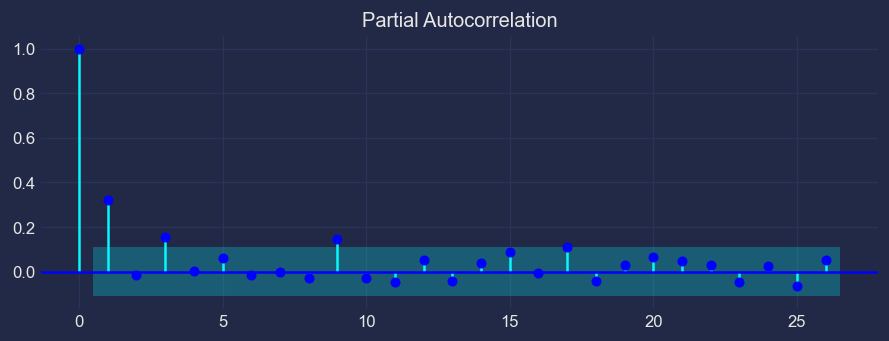

In [108]:
plot_pacf(serie_94_21.value.diff().dropna(), c='BLUE')
plt.show()

El retardo 1 de PACF es bastante significativo ya que está muy por encima de la línea de significación. El retardo 2 también resulta significativo, logrando cruzar levemente el límite de significancia (región azul). 

Como ligeramente solo 1 se aleja del límite, por lo tanto 𝑝 = 1.

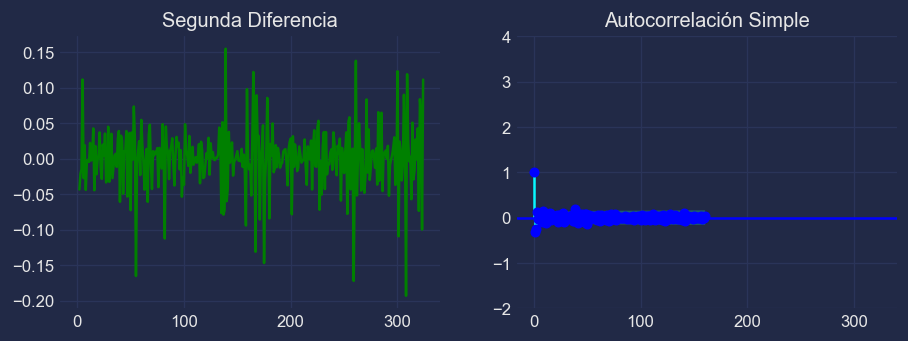

In [111]:
#Encontrando el orden del término MA (q)
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(serie_94_21.value.diff().diff().dropna(), color='g'); axes[0].set_title('Segunda Diferencia')
axes[1].set(ylim=(-2,4))
plot_acf(serie_94_21.value.diff().diff().dropna(), ax=axes[1], lags=160, color='blue')
plt.title('Autocorrelación Simple')
plt.show()

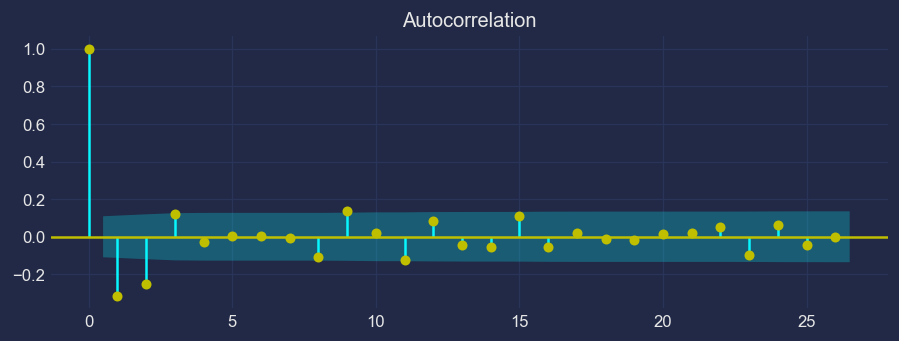

In [112]:
plot_acf(serie_94_21.value.diff().diff().dropna(), c='y')
plt.show()

Un par de retrasos están muy por encima de la línea de importancia. 

En el gráfico figura el segundo como una buena opción, porque el tercero se encuentra en el límite por lo tanto 𝑞= 2.

In [118]:
from statsmodels.tsa.arima_model import ARIMA
#orden = p , d , q 
# p=1,d=1,q=2

#Modelo ARIMA p=1,,d=1 , q=2
modelo_arima = ARIMA(serie_94_21.value, order=(1,1,2))
modelo_final = modelo_arima.fit(disp=0)
print(modelo_final.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  324
Model:                 ARIMA(1, 1, 2)   Log Likelihood                 623.491
Method:                       css-mle   S.D. of innovations              0.035
Date:                Sat, 11 Sep 2021   AIC                          -1236.983
Time:                        00:18:34   BIC                          -1218.079
Sample:                             1   HQIC                         -1229.437
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0076      0.006      1.270      0.204      -0.004       0.019
ar.L1.D.value     0.9620      0.042     23.108      0.000       0.880       1.044
ma.L1.D.value    -0.6016      0.074     

El modelo se ha reducido, lo cual es super bueno. Los valores P de los términos AR1 y MA1 son altamente significativos (<< 0.05).

Grafiquemos los residuos para asegurarnos de que no haya patrones (es decir, busquemos la media y la varianza constantes)

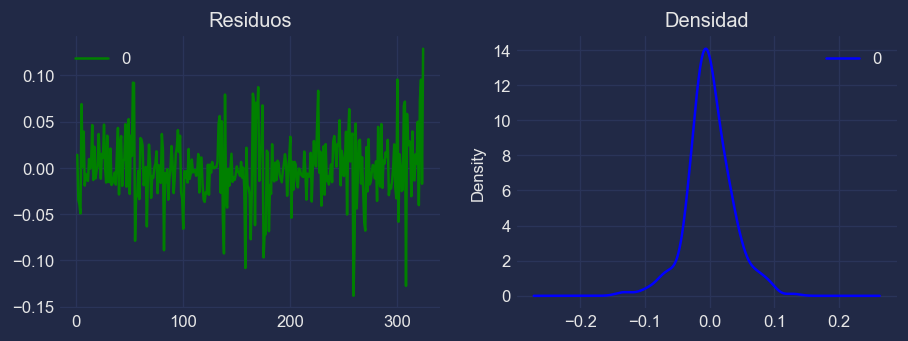

In [121]:
# Grpafico de los Residuos
residuos = pd.DataFrame(modelo_final.resid)
fig, ax = plt.subplots(1,2)
residuos .plot(title="Residuos", ax=ax[0], color='g')
residuos .plot(kind='kde', title='Densidad', ax=ax[1], color='b')
plt.show()

Los errores residuales parecen estar bien con una media cercana a cero y una varianza uniforme. Grafiquemos los valores reales contra los valores ajustados usando plot_predict()

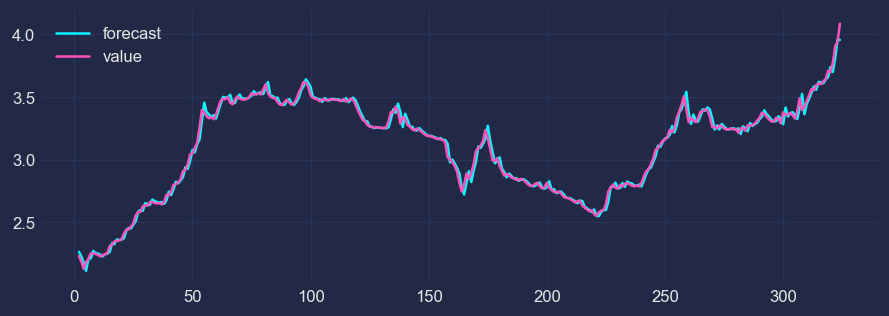

In [122]:
# Actual vs Ajustado
modelo_final.plot_predict(dynamic=False)
plt.show()

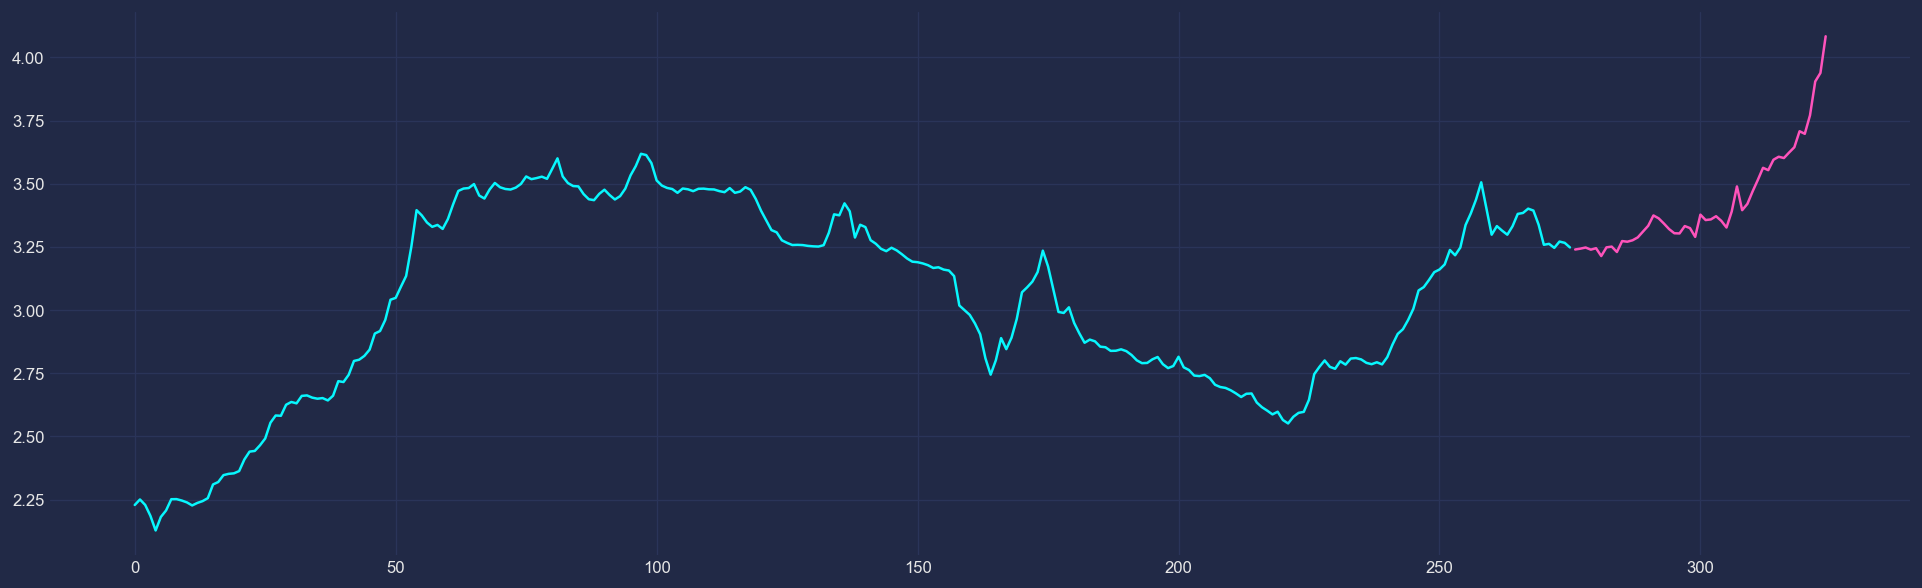

In [135]:
#Cómo encontrar el modelo ARIMA óptimo manualmente usando la validación cruzada fuera de tiempo
# Creando la serie de Entrenamiento y Test
# n = int(len(df.value) * 2/3)
# train = df.value[:n]
# test = df.value[n:]

entrenamiento = serie_94_21.value[:276]
test = serie_94_21.value[276:]
plt.figure(figsize=(20, 6))
plt.plot(entrenamiento )
plt.plot(test)


Ahora podemos construir el modelo ARIMA en el conjunto de datos de entrenamiento, pronosticarlo y trazarlo.

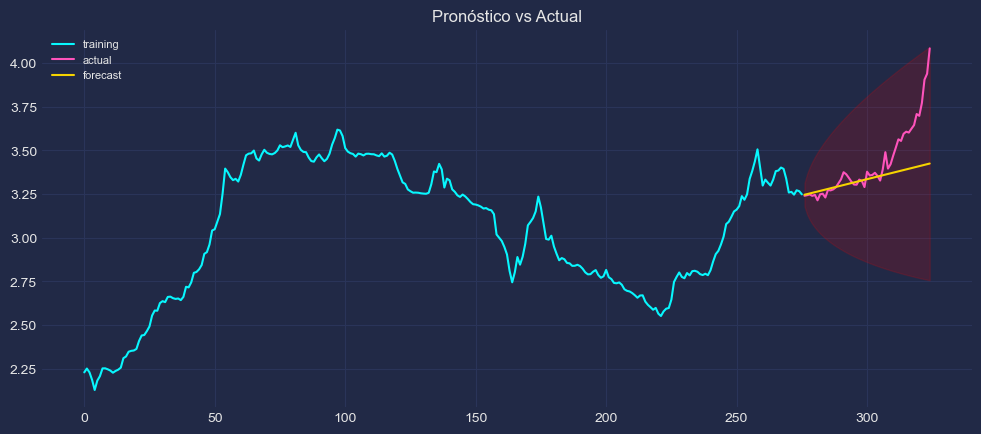

In [146]:
# Modelo de Entrenamiento
# model = ARIMA(entrenamiento, order=(3,2,1))  
modelo_train = ARIMA(entrenamiento, order=(1, 1, 1))  
fitted = modelo_train.fit(disp=-1)  

# Pronóstico
fc, se, conf = fitted.forecast(49, alpha=0.05)  # 95% conf

# Creando Series con Pandas
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(entrenamiento, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='r', alpha=.15)
plt.title('Pronóstico vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [145]:
# Construcción del Modelos
model = ARIMA(entrenamiento, order=(1, 2, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(49, alpha=0.05)  # 95% conf

# Creando Series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)



                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                  274
Model:                 ARIMA(1, 2, 2)   Log Likelihood                 540.885
Method:                       css-mle   S.D. of innovations              0.033
Date:                Sat, 11 Sep 2021   AIC                          -1071.769
Time:                        01:02:55   BIC                          -1053.704
Sample:                             2   HQIC                         -1064.518
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -3.617e-05      0.000     -0.306      0.759      -0.000       0.000
ar.L1.D2.value    -0.0544      0.155     -0.351      0.726      -0.358       0.249
ma.L1.D2.value    -0.5076      0.141

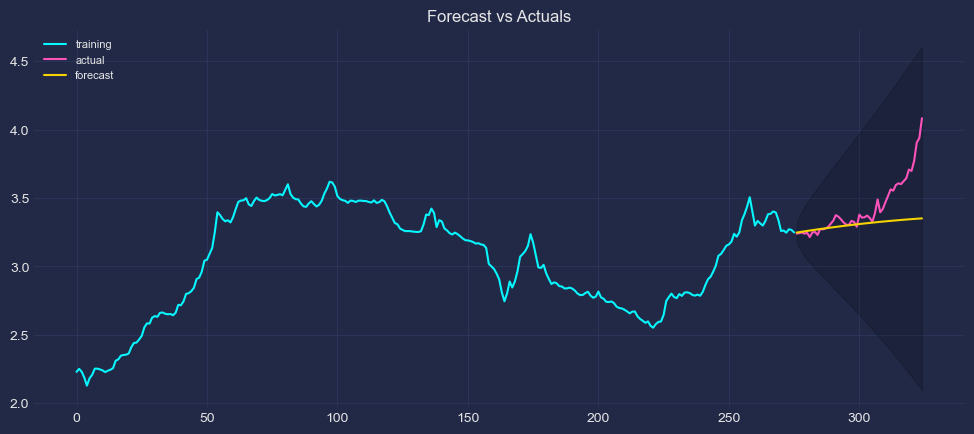

In [144]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(entrenamiento, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Para el modelo (1,2,2) vemos que se aleja del pronostico . 

Por lo tanto el modelo ARIMA (1,1,2) parece dar un pronóstico direccionalmente correcto. 
Y los valores reales observados se encuentran dentro de la banda de confianza del 95%. 
Eso parece estar bien.

### 2. Modelo Sarima
Utilizando la información de GlobalLandTemperaturesByMajorCity para Lima -Perú desde 1990-01 hasta 2013-09, estimar un modelo Sarima que mejor se ajuste a los datos y realizar una proyección. Y analizar los resultados obtenidos.


In [174]:
#importando bibliotecas y módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import requests
import time
from io import StringIO
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# Una mejor vizualización de los datos
import mplcyberpunk
plt.style.use("cyberpunk")
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [199]:
#Importando los datos y colocando la columna de fecha como índice. Entonces, ya tenemos una serie
datos = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv',usecols=['dt', 'AverageTemperature', 'City'], parse_dates=['dt'], index_col=2) 
datos
#tomando datos 
base_= df[df.City == 'Lima']
base
# #dropeamos la columna de la ciudad dado que ya contiene la info
base_lima = base.drop('City', axis=1)
base_lima

,AverageTemperature
dt,
1881-03-01,20.013
1881-04-01,18.516
1881-05-01,16.673
1881-06-01,14.278
1881-07-01,13.748
...,...
2013-05-01,16.512
2013-06-01,14.491
2013-07-01,13.343


In [205]:
base_lima=base_lima.loc['1990-01-01':'2013-09-01']
print(base_lima)
#tomando datos 


            AverageTemperature
dt                            
1990-01-01              20.194
1990-02-01              20.293
1990-03-01              20.511
1990-04-01              18.595
1990-05-01              17.488
...                        ...
2013-05-01              16.512
2013-06-01              14.491
2013-07-01              13.343
2013-08-01              13.643
2013-09-01                 NaN

[285 rows x 1 columns]


<AxesSubplot:xlabel='dt'>

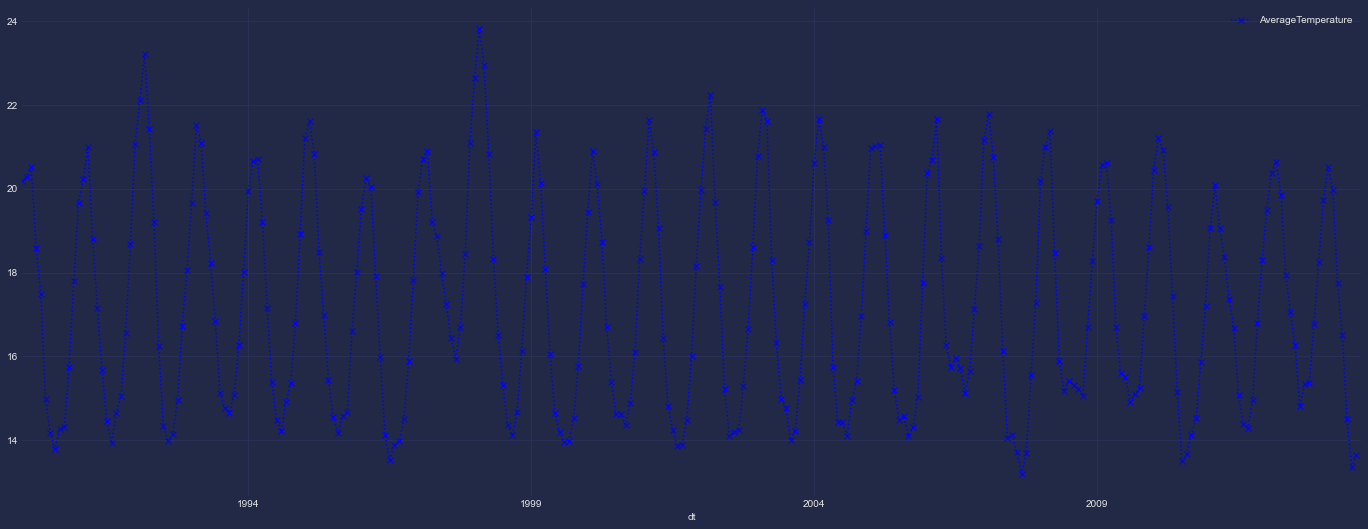

In [206]:
base_lima.plot(figsize=(24,9), c='b', marker='x', linestyle=':')


In [207]:
#Tenemos otros valores nulos
print('Número de valores nulos: ', base_lima.AverageTemperature.isnull().sum())
#¿En qué fecha se produce este valor nulo?
print('\n\n ¿Cuándo ocurre este valor nulo?')
print(base_lima[base_lima.AverageTemperature.isnull()])

Número de valores nulos:  1


 ¿Cuándo ocurre este valor nulo?
            AverageTemperature
dt                            
2013-09-01                 NaN


In [208]:
base_lima = base_lima.dropna()
base_lima

,AverageTemperature
dt,
1990-01-01,20.194
1990-02-01,20.293
1990-03-01,20.511
1990-04-01,18.595
1990-05-01,17.488
...,...
2013-04-01,17.756
2013-05-01,16.512
2013-06-01,14.491


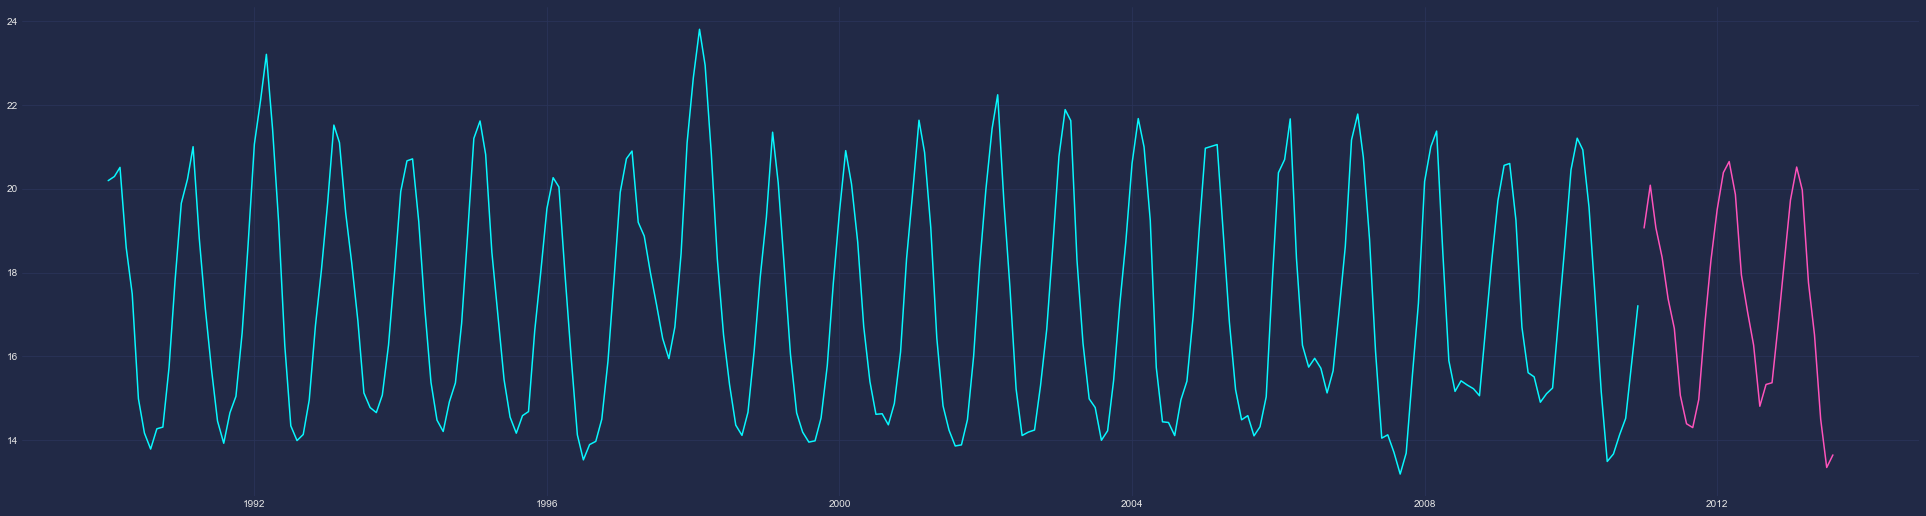

In [397]:
#Antes de continuar con el análisis, separemos nuestro conjunto de datos en conjunto de entrenamiento 
#y conjunto de prueba. De esta forma evitamos cualquier tipo de fuga de datos en el modelado que haremos a continuación.
lima_train = base_lima [:'2010']
lima_test = base_lima ['2011':]
plt.figure(figsize=(34, 9))
plt.plot(lima_train)
plt.plot(lima_test)

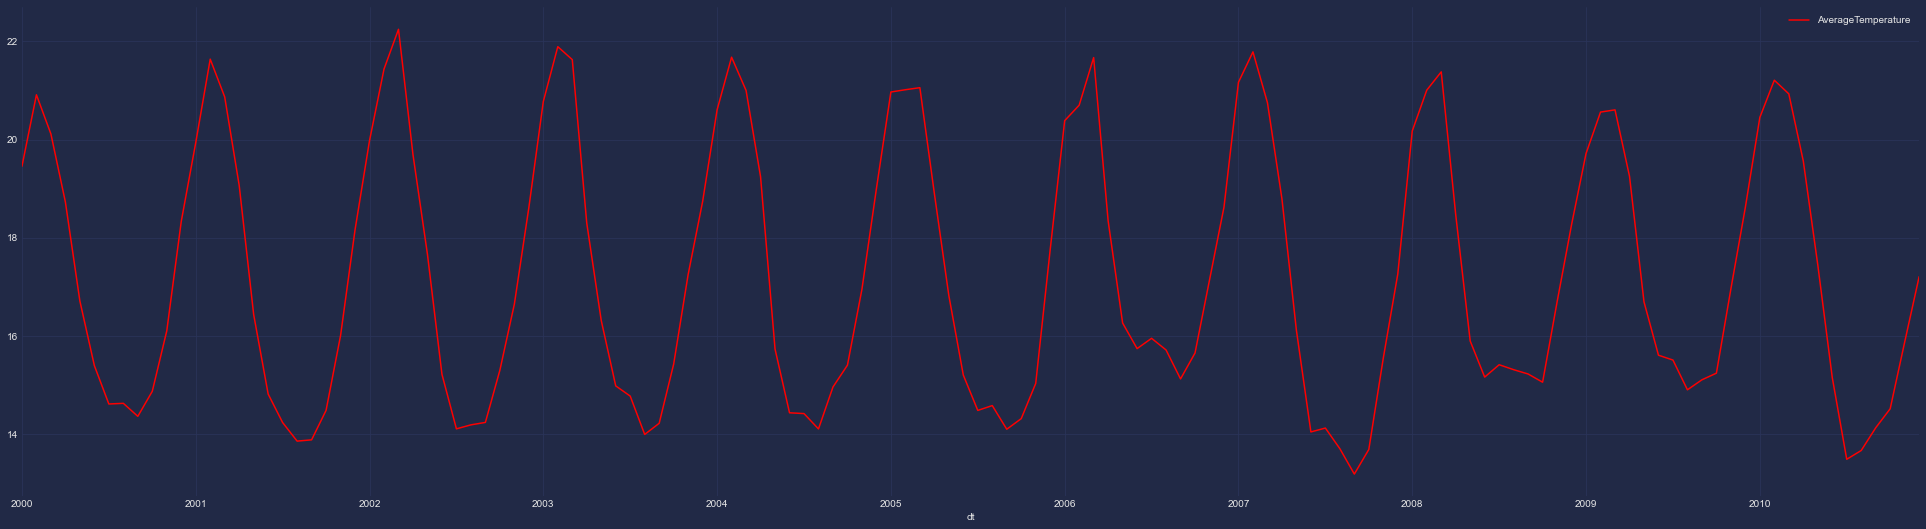

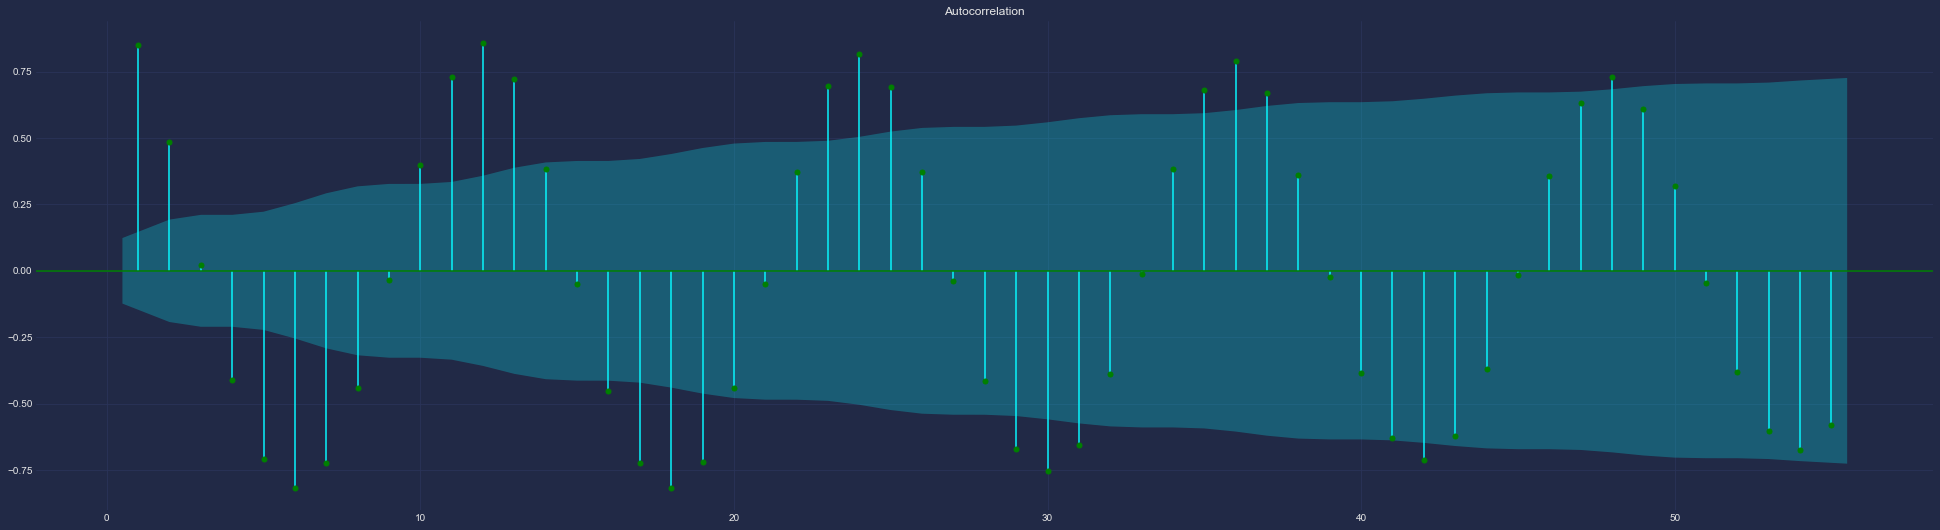

In [334]:
#3. Estacionalidad
lima_train.loc['2000':].plot(c='r',figsize=(34, 9))
#Graficando el ACF:
fig, ax1 = plt.subplots(figsize=(34, 9))
plot_acf(lima_train.AverageTemperature, lags=55, zero=False,  ax=ax1, color='GREEN')
plt.show()


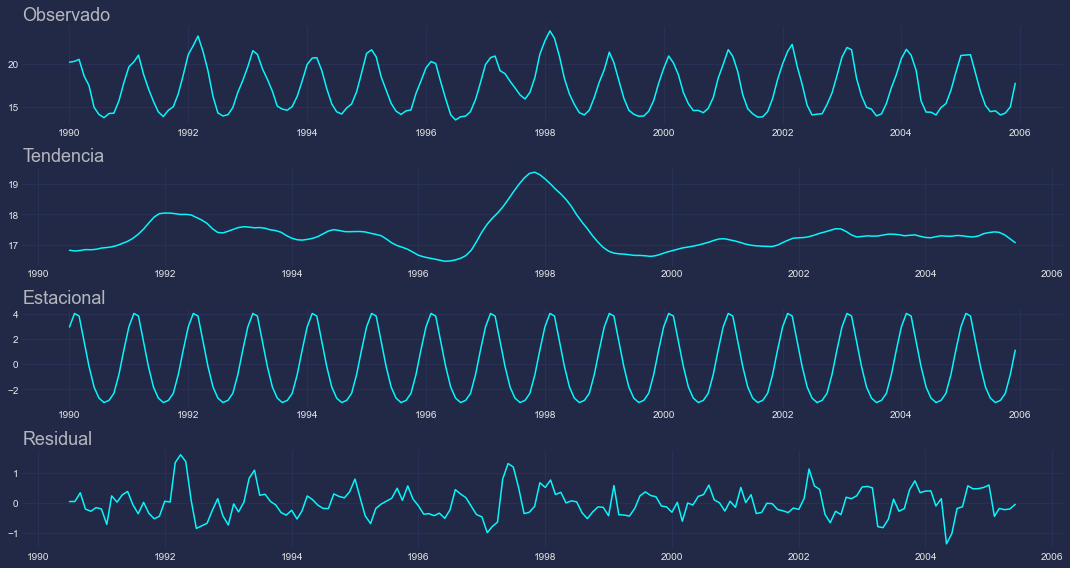

In [213]:
#Descomponiendo la serie en tendencia, estacionalidad y residuos:
estacional_dec = seasonal_decompose(lima_train.AverageTemperature, period = 12)

ax, fig = plt.subplots(figsize=(15,8), sharex=True)

plt.subplot(411)
plt.plot(lima_train.AverageTemperature, label="Original")
plt.title("Observado",loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(estacional_dec.trend, label="Tendencia")
plt.title("Tendencia",loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(estacional_dec.seasonal, label="Estacional")
plt.title("Estacional",loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(estacional_dec.resid, label="Residual")
plt.title("Residual",loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()

#Observamos que hay una tendencia creciente en la temperatura, especialmente después de 1997
#mientras que el factor de estacionalidad parece tener una influencia constante a lo largo de todo el período.

In [228]:
#4. Estacionariedad
#Antes de continuar con nuestro modelado, necesitamos estudiar la estacionariedad de la serie, 
#que es una suposición del modelo ARIMA que pretendemos utilizar.
#test ADF
resultado_estacionariedad = adfuller(lima_train.AverageTemperature)
#p-valor:
print('p-valor: ', resultado_estacionariedad [1])

p-valor:  0.00017626136649468455


In [230]:
#Eliminar las diferencias con un retraso de 12 meses y desechar los valores nulos generados
base_lima_final= lima_train.copy()
base_lima_final.AverageTemperature = lima_train.AverageTemperature.diff(12)
base_lima_final= base_lima_final.dropna()
base_lima_final

,AverageTemperature
dt,
1991-01-01,-0.541
1991-02-01,-0.065
1991-03-01,0.494
1991-04-01,0.213
1991-05-01,-0.347
...,...
2005-08-01,0.476
2005-09-01,-0.860
2005-10-01,-1.089


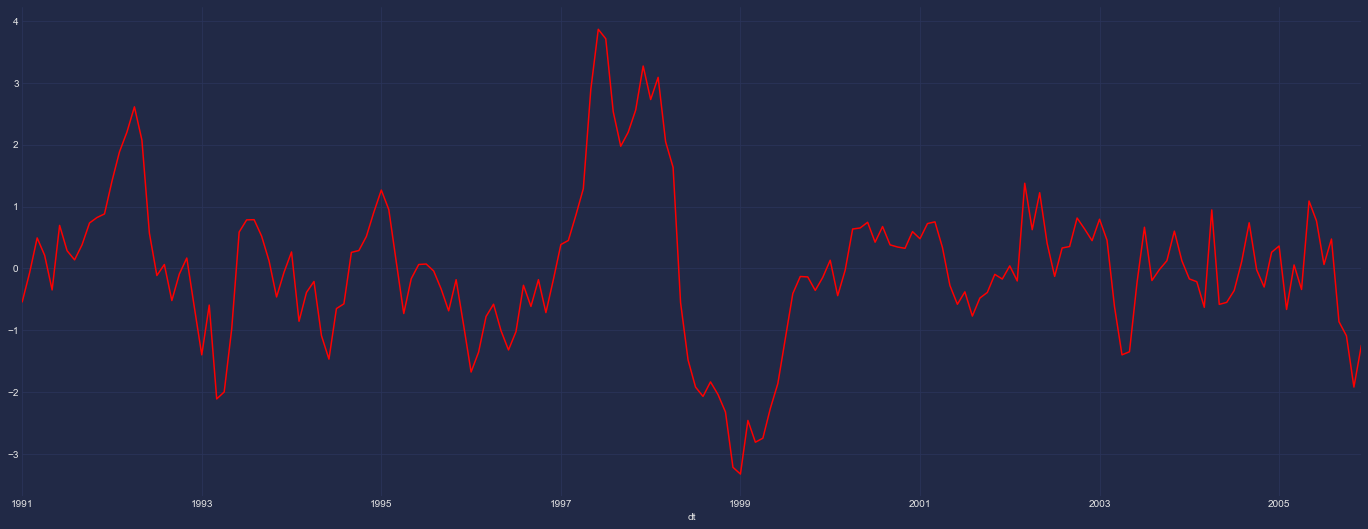

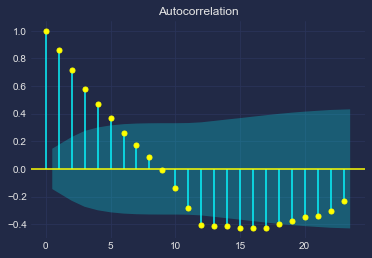

In [239]:
#Graficando la serie de diferencias de 12 meses
base_lima_final.AverageTemperature.plot(figsize=(24,9), color='RED')
plt.show()

plot_acf(base_lima_final.AverageTemperature, c='YELLOW')
plt.show()

In [233]:
#Test ADF
resultado_adf = adfuller(base_lima_final.AverageTemperature)
#P-valor:
print('p-valor: ', resultado_adf[1])

#A partir del gráfico, la serie de diferencias de rezago de 12 meses parece ser estacionaria. 
#El valor es significativo . 
#Por lo tanto es estacionaria 

p-valor:  8.83172360958236e-05


In [234]:
#Modelado
#Antes de ejecutar esta sentencia, verificar que su computadora tenga mínimo 16 
import pmdarima as pm

#Entrenando diferentes modelos y manteniendo el AIC más pequeño
#Testeamos valores entre 0 y 3 para cada orden del modelo.
modelo_optimo = pm.auto_arima(lima_train,
                      seasonal=True, m=12,
                      d=0, D=1,
                      start_p=0, start_q=0, start_P=0, start_Q=0,
                      max_p=3, max_q=3, max_P=3, max_Q=3,
                      max_order=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
print(modelo_optimo.summary())  

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=583.686, Time=0.23 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=301.161, Time=0.49 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.79 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=581.702, Time=0.04 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=336.115, Time=0.13 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=282.400, Time=1.17 sec
 ARIMA(1,0,0)(3,1,0)[12] intercept   : AIC=277.029, Time=1.79 sec
 ARIMA(1,0,0)(3,1,1)[12] intercept   : AIC=271.424, Time=4.84 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=269.462, Time=1.92 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=268.375, Time=0.81 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=266.509, Time=0.62 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=268.346, Time=1.59 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=270.061, Time=2.17 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=1.27 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AI

In [ ]:
La búsqueda tomó alrededor de 30 minutos para determinar que 
el modelo óptimo, entre los buscados, es el SARIMA ARIMA(2,0,1)(0,1,1)[12]. Así, la parte no estacional 
tiene órdenes (p, d, q) = (2,0,1) y la parte estacional tiene órdenes (P, D, Q) S = (0,1,1) 12.

A continuación, entrenamos este gran modelo usando la biblioteca statsmodels.

In [235]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo_optimo = SARIMAX(lima_train, order=(2,0,1), trend='c', seasonal_order=(0,1,1,12))
resultados_finales = modelo_optimo.fit()
print(resultados_finales.summary())

                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                  192
Model:             SARIMAX(2, 0, 1)x(0, 1, 1, 12)   Log Likelihood                -125.664
Date:                            Sat, 11 Sep 2021   AIC                            263.329
Time:                                    11:37:13   BIC                            282.486
Sample:                                01-01-1990   HQIC                           271.096
                                     - 12-01-2005                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0004      0.000     -0.964      0.335      -0.001       0.000
ar.L1          1.8310      0.040   

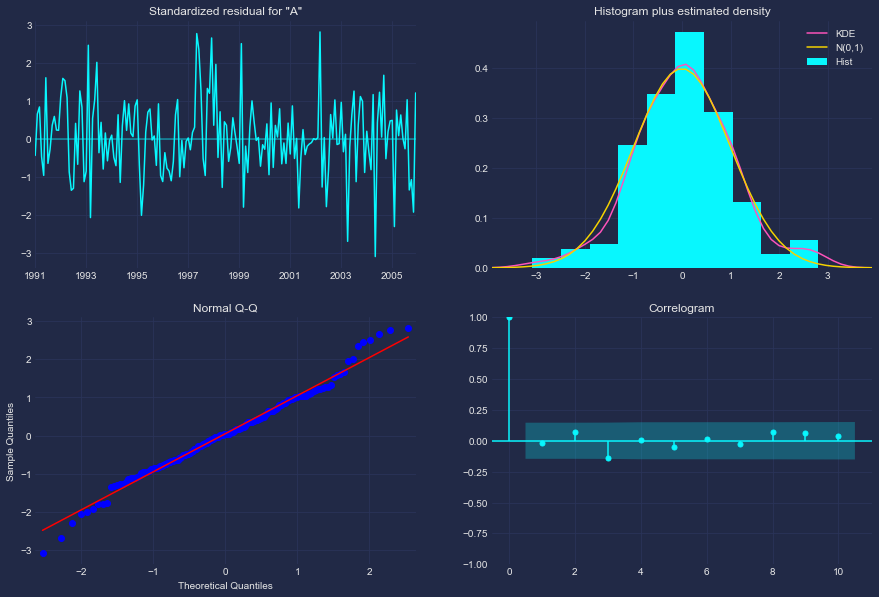

In [237]:
resultados_finales.plot_diagnostics(figsize=(15,10))
plt.show()

In [ ]:
#################### ES SIGNIFICATIVO : LOS RESIDUOS PRESENTAN UN COMPORTAMIENTO NORMAL ##############################

In [347]:
#Error absoluto medio en el conjunto de entrenamiento
MAE = np.mean(np.abs(resultados_finales.resid['1990':]))
print(f"\nMean Absolute Error en el conjunto de entrenamiento: {MAE}\n")

#previsões in-sample:
predicciones_train = resultados_finales.predict(start=0, end=len(lima_train)-1)
predicciones_train.name = 'train prediction'
print(predicciones_train)


Mean Absolute Error en el conjunto de entrenamiento: 1.4045224301802375

1990-01-01    -0.019889
1990-02-01    -0.019863
1990-03-01    -0.019842
1990-04-01    -0.019824
1990-05-01    -0.019812
                ...    
2010-08-01    14.173158
2010-09-01    14.250978
2010-10-01    14.847554
2010-11-01    16.184645
2010-12-01    18.310666
Freq: MS, Name: train prediction, Length: 252, dtype: float64


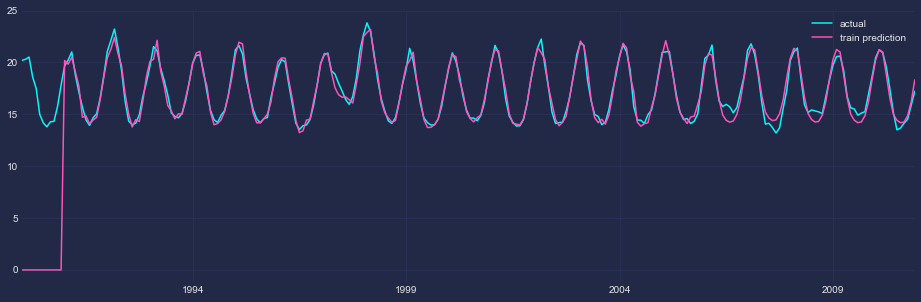

In [349]:
#Graficando los valores reales y pronósticos de 1990:
grafico_final = pd.concat([lima_train.rename(columns={'AverageTemperature': 'actual'}), predicciones_train], axis=1)
grafico_final.loc['1990':].plot(figsize=(16,5))
plt.show()

In [350]:
media, dp, amplitud = lima_train.mean()[0], lima_train.std()[0], (lima_train.max() - lima_train.min())[0]
print('En conjunto de entrenamiento:\nmedia :', media)
print('desviación estándar :', dp)
print('amplitud: ', amplitud)

En conjunto de entrenamiento:
media : 17.28580158730158
desviación estándar : 2.6540463477965957
amplitud:  10.623000000000001


In [375]:
#predicciones fuera de la muestra usando el conjunto de prueba (puntos nunca vistos por el modelo):
predicciones_test = resultados_finales.predict(start=(len(lima_train)), end=(len(lima_train)+len(lima_test)-12))
predicciones_test.name = 'test prediction'
predicciones_test

2011-01-01    20.215851
2011-02-01    21.209405
2011-03-01    20.972941
2011-04-01    18.818686
2011-05-01    16.542813
2011-06-01    14.972575
2011-07-01    14.396466
2011-08-01    14.160478
2011-09-01    14.237281
2011-10-01    14.832877
2011-11-01    16.169037
2011-12-01    18.294185
2012-01-01    20.198564
2012-02-01    21.191384
2012-03-01    20.954261
2012-04-01    18.799424
2012-05-01    16.523043
2012-06-01    14.952372
2012-07-01    14.375902
2012-08-01    14.139618
2012-09-01    14.216189
2012-10-01    14.811610
2012-11-01    16.147647
2012-12-01    18.272719
2013-01-01    20.177064
2013-02-01    21.169885
2013-03-01    20.932793
2013-04-01    18.778012
2013-05-01    16.501708
2013-06-01    14.931129
2013-07-01    14.354763
2013-08-01    14.118591
2013-09-01    14.195278
Freq: MS, Name: test prediction, dtype: float64

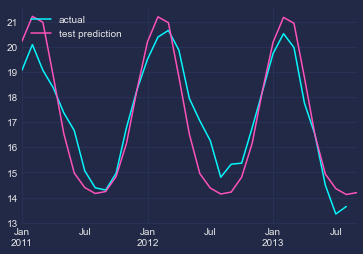

In [376]:
#Graficando los valores reales y las predicciones del conjunto de prueba
grafico_test = pd.concat([base_lima.rename(columns={'AverageTemperature': 'actual'}), predicciones_test], axis=1)
grafico_test.loc['2011':].plot()
plt.show()

In [384]:
#Error absoluto promedio en el conjunto de pruebas (puntos nunca vistos por el algoritmo)
residuos_lima = grafico_test.loc['2011':].actual - grafico_test .loc['2011':]['test prediction']
MAE = np.mean(np.abs(residuos_lima))
print(f"\nError absoluto promedio en el conjunto de pruebas: {MAE}\n")


Error absoluto promedio en el conjunto de pruebas: 0.7863809801824976



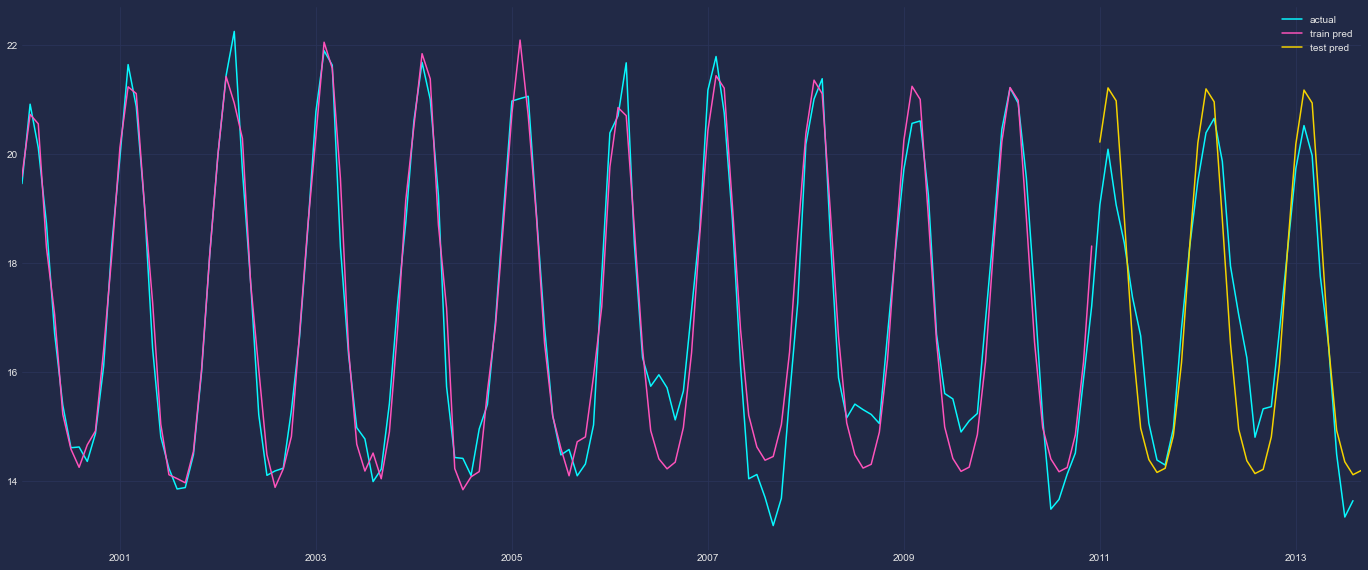

In [385]:
#Graficamos los valores reales y predicciones para conjuntos de entrenamiento y prueba
grafico_prediccion= pd.concat([base_lima.rename(columns={'AverageTemperature': 'actual'}), predicciones_train.rename('train pred'), predicciones_test.rename('test pred')], axis=1)
grafico_prediccion.loc['2000':].plot(figsize=(24,10))
plt.show()

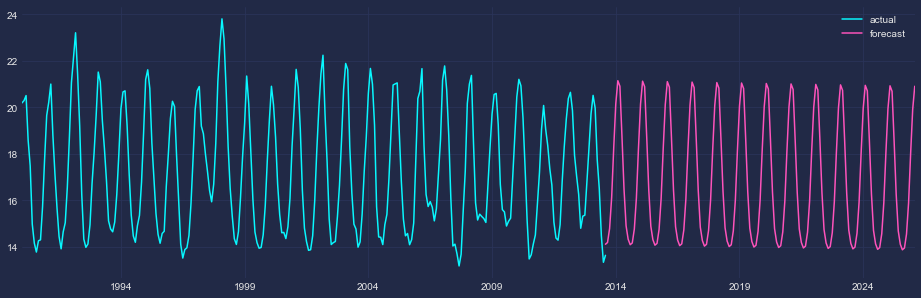

In [399]:
#Pronóstico fuera de la muestra utilizando el conjunto de prueba (puntos nunca vistos por el modelo):
forecast = resultados_finales.predict(start=(len(lima_train)+len(lima_test)-1), end=(len(lima_train)+len(lima_test)-1+150))
forecast.name = 'forecast'

#Graficando lo valores
grafico_final  = pd.concat([base_lima.rename(columns={'AverageTemperature': 'actual'}), forecast], axis=1)
grafico_final .loc['1990':].plot(figsize=(16,5))
plt.show()

### 3. Modelo Arima vs Sarima
Utilizando la serie del BCRP del Producción agropecuaria (miles de toneladas) - Agrícola - Maíz Amarillo Duro (PN01791AM) desde 2007-01 hasta el 2021-06, estimar un modelo ```Arima``` y ```Sarima``` y determinar que modelo se ajusta mejor a los datos y realizar una proyección de la Producción de Maíz. Y analizar los resultados obtenidos.

In [241]:
# pip install mplcyberpunk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # gráficos
# Se usan para realizar el web scraping
import requests
import time
from io import StringIO
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# Una mejor vizualización de los datos
import mplcyberpunk
plt.style.use("cyberpunk")
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [456]:
base_datos = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01791AM/csv/2007-1/2021-6"
content = requests.get(base_datos,verify=False).text.replace("<br>","\n").strip()
content
csv =  StringIO(content)
serie_07_21= pd.read_csv(csv)
serie_07_21.columns = ['date', 'value']
serie_07_21

,date,value
0,Ene.2007,72.384329
1,Feb.2007,93.525770
2,Mar.2007,66.258969
3,Abr.2007,59.029558
4,May.2007,83.383422
...,...,...
169,Feb.2021,118.919699
170,Mar.2021,72.607093
171,Abr.2021,61.752598
172,May.2021,86.955658


Text(0.5, 1.0, 'Serie Original-  Producción agropecuaria ')

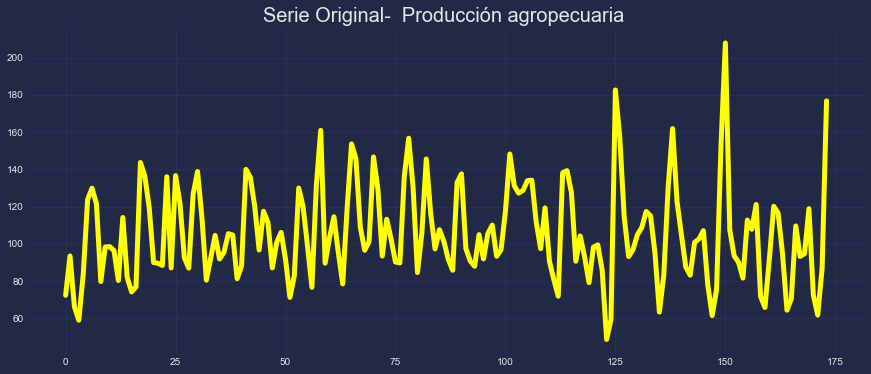

In [245]:
plt.figure(figsize=(15,6))
# Serie Original
plt.plot(serie_07_21.value,lw=5, c='yellow')
plt.title("Serie Original-  Producción agropecuaria ", fontsize=20)

Hacemos la prueba de ```Augmented Dickey Fuller()``` para proba estacionalidad

In [404]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
resultado_serie = adfuller(serie_07_21.value.dropna())
print('ADF Statistic: %f' % resultado_serie[0])
print('p-value: %f' % resultado_serie[1])

ADF Statistic: -3.532086
p-value: 0.007200


Como el valor ```P-value =0.007200``` es menor  que el nivel de significancia, tenemos que diferenciar la serie y veremos cómo se ve el gráfico de autocorrelación.

Por lo tanto se rechaza la hipotesis nula , es decir es estacionaria...


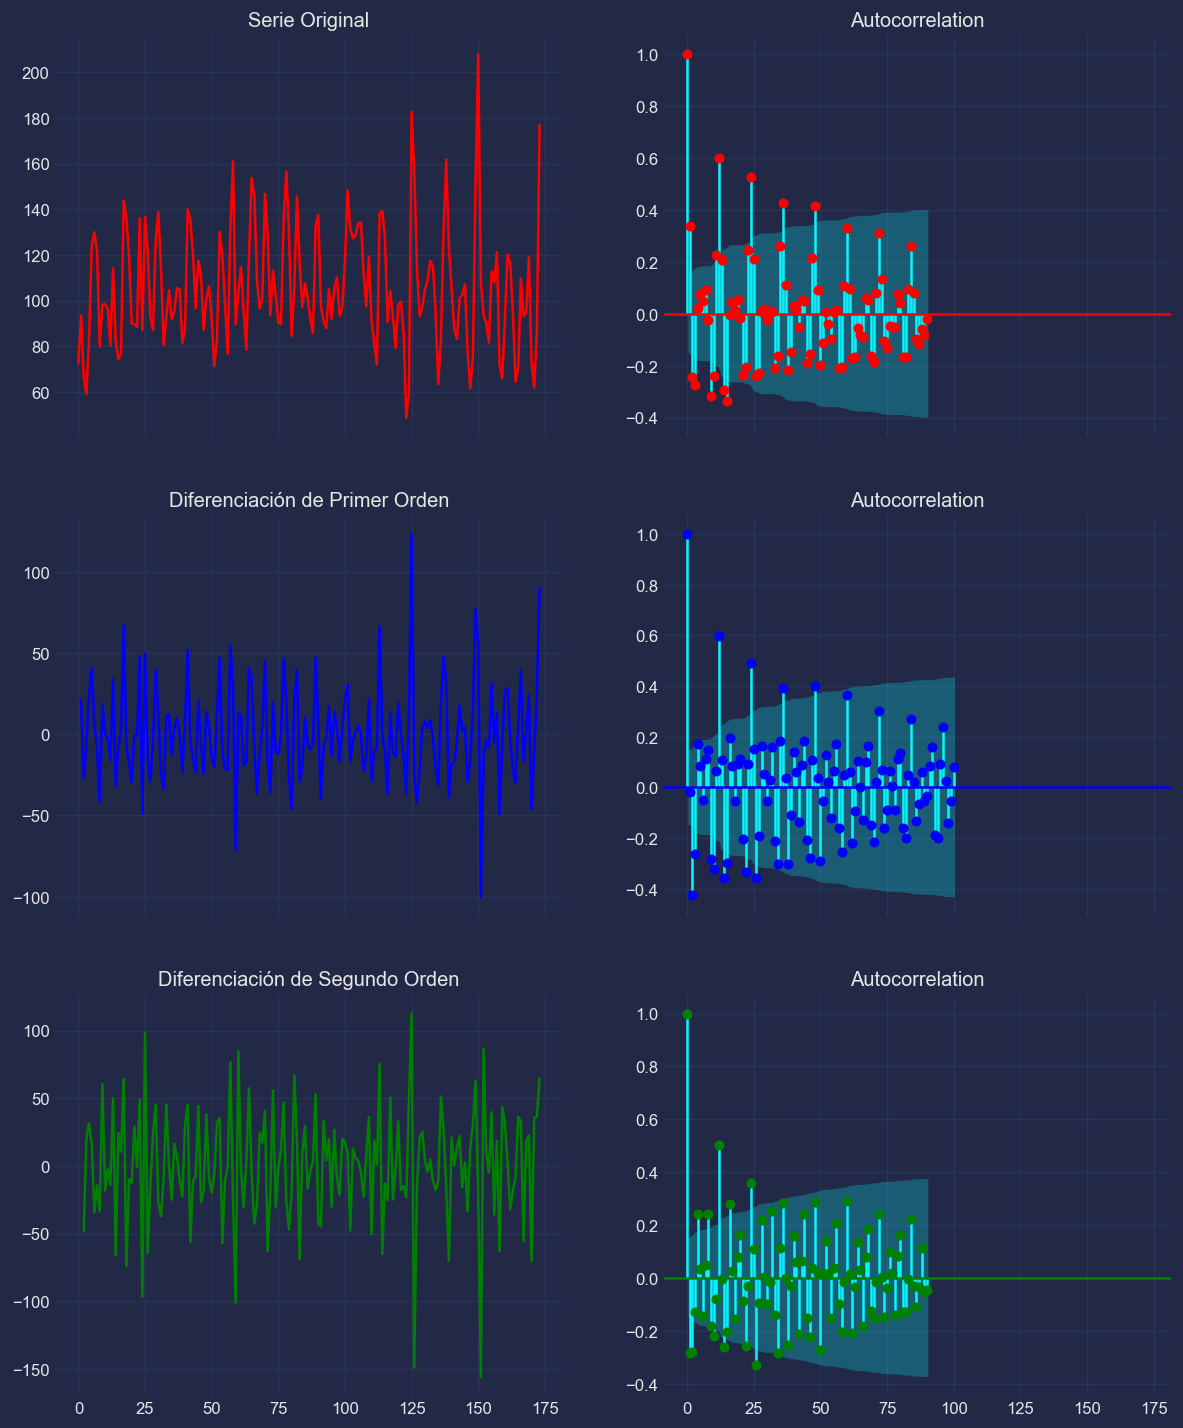

In [406]:
plt.rcParams.update({'figure.figsize':(12,15), 'figure.dpi':120})
# Serie Original
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(serie_07_21.value, c='r'); axes[0, 0].set_title('Serie Original')
plot_acf(serie_07_21.value, ax=axes[0, 1], lags=90, c='r')

# 1ra Diferencia
axes[1, 0].plot(serie_07_21.value.diff(), c='b'); axes[1, 0].set_title('Diferenciación de Primer Orden')
plot_acf(serie_07_21.value.diff().dropna(), ax=axes[1, 1], lags=100, c='b')

# 2nda Diferencia
axes[2, 0].plot(serie_07_21.value.diff().diff(), c='g'); axes[2, 0].set_title('Diferenciación de Segundo Orden')
plot_acf(serie_07_21.value.diff().diff().dropna(), ax=axes[2, 1], lags=90, c='g')

plt.show()

Se puede decir que la serie  alcanza la estacionariedad con 1 orden de diferenciación pero con dos órdenes de diferenciación se ajusta mejor. 
Por lo tanto, se va a tomar el orden de diferenciación como 1.

In [413]:
#Segunda prueba con los datos diferenciados1 vez
from statsmodels.tsa.stattools import adfuller
primera_diferenciacion = adfuller(serie_07_21.value.diff().dropna())
print('1ra Diferencia')
print('ADF Statistic: %f' % primera_diferenciacion[0])
print('p-value: %f' % primera_diferenciacion[1])


##EL MODELO YA ES ESTACIONARIO CON EL VALOR DE 1 
#RECHAZAMOS LA HIPOTESIS NULA 

1ra Diferencia
ADF Statistic: -4.820849
p-value: 0.000050


El valor de $d=1$

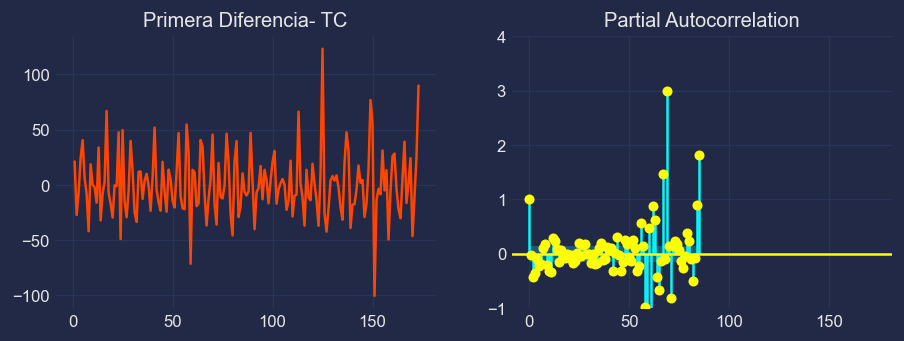

In [417]:
#Encontrando el orden del término AR (p)
# Gráfico PACF de la  1st diferencia de la serie
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(serie_07_21.value.diff().dropna(), c='orangered'); axes[0].set_title('Primera Diferencia- TC')
axes[1].set(ylim=(-1,4))
plot_pacf(serie_07_21.value.diff().dropna(), c='YELLOW',ax=axes[1], lags=85)

plt.show()

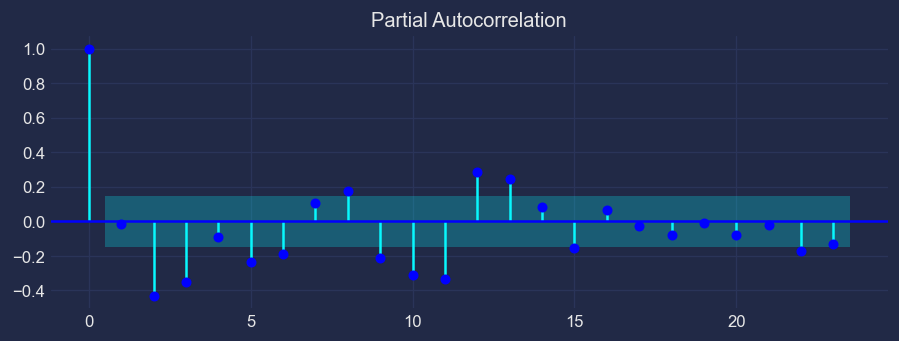

In [418]:
plot_pacf(serie_07_21.value.diff().dropna(), c='BLUE')
plt.show()

El retardo 1 de PACF es bastante significativo ya que está muy por encima de la línea de significación. El retardo 2 también resulta significativo, logrando cruzar levemente el límite de significancia (región azul). 

Como se alejan del límite, por lo tanto 𝑝 = 1.

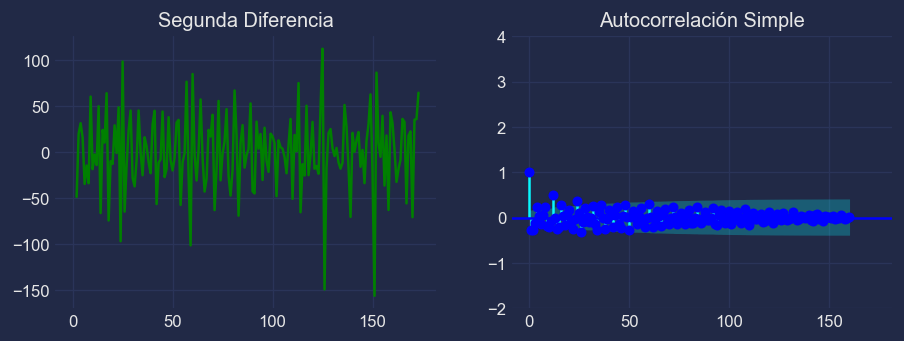

In [419]:
#Encontrando el orden del término MA (q)
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(serie_07_21.value.diff().diff().dropna(), color='g'); axes[0].set_title('Segunda Diferencia')
axes[1].set(ylim=(-2,4))
plot_acf(serie_07_21.value.diff().diff().dropna(), ax=axes[1], lags=160, color='blue')
plt.title('Autocorrelación Simple')
plt.show()

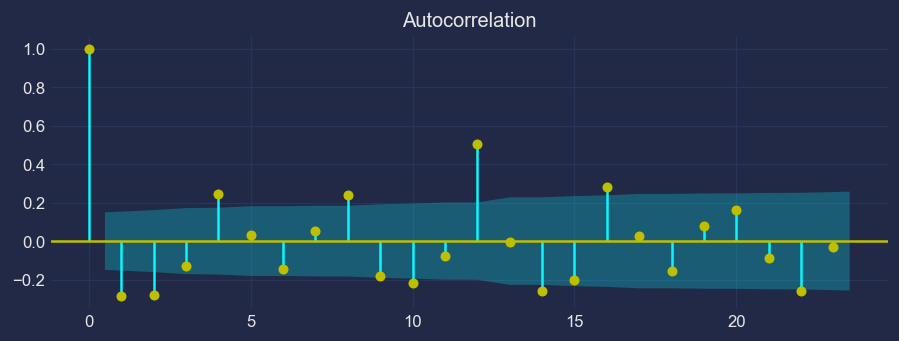

In [421]:
plot_acf(serie_07_21.value.diff().diff().dropna(), c='y')
plt.show()

Un par de retrasos están muy por encima de la línea de importancia. 

En el gráfico figura el segundo como una buena opción, porque el tercero se encuentra en el límite por lo tanto 𝑞= 1.

In [431]:
from statsmodels.tsa.arima_model import ARIMA
#orden = p , d , q 
# p=1,d=1,q=1

#Modelo ARIMA p=1,,d=1 , q=2
modelo_arima = ARIMA(serie_07_21.value, order=(1,1,1))
modelo_final = modelo_arima.fit(disp=0)
print(modelo_final.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  173
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -799.017
Method:                       css-mle   S.D. of innovations             24.214
Date:                Sat, 11 Sep 2021   AIC                           1606.034
Time:                        15:32:36   BIC                           1618.647
Sample:                             1   HQIC                          1611.151
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0132      0.057      0.232      0.817      -0.098       0.125
ar.L1.D.value     0.3631      0.074      4.937      0.000       0.219       0.507
ma.L1.D.value    -1.0000      0.019    -

El modelo se ha reducido, lo cual es super bueno. Los valores P de los términos AR1 y MA1 son altamente significativos (<< 0.05).

Grafiquemos los residuos para asegurarnos de que no haya patrones (es decir, busquemos la media y la varianza constantes)

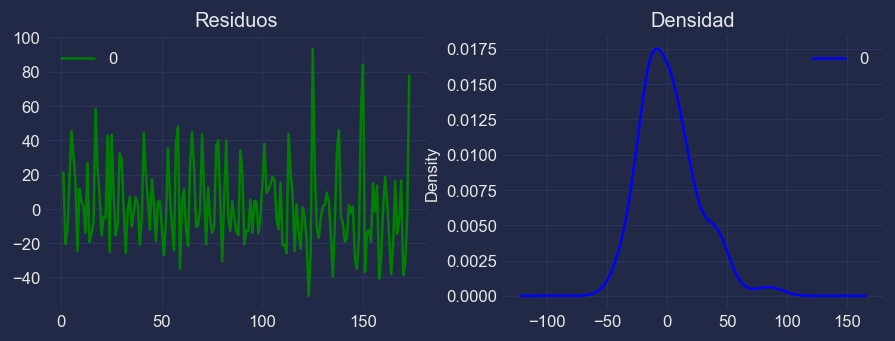

In [432]:
# Grpafico de los Residuos
residuos = pd.DataFrame(modelo_final.resid)
fig, ax = plt.subplots(1,2)
residuos .plot(title="Residuos", ax=ax[0], color='g')
residuos .plot(kind='kde', title='Densidad', ax=ax[1], color='b')
plt.show()

Los errores residuales parecen estar bien con una media cercana a cero y una varianza uniforme. Grafiquemos los valores reales contra los valores ajustados usando plot_predict()

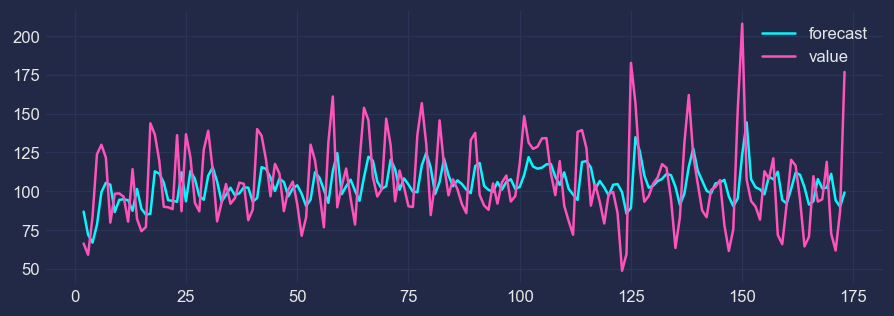

In [433]:
# Actual vs Ajustado
modelo_final.plot_predict(dynamic=False)
plt.show()

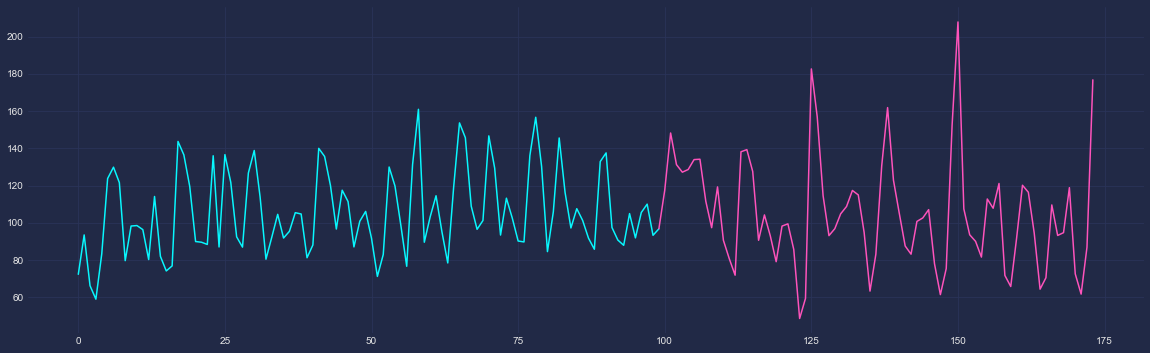

In [520]:
#Cómo encontrar el modelo ARIMA óptimo manualmente usando la validación cruzada fuera de tiempo
# Creando la serie de Entrenamiento y Test
# n = int(len(df.value) * 2/3)
# train = df.value[:n]
# test = df.value[n:]

entrenamiento = serie_07_21.value[:100]
test = serie_07_21.value[99:]
plt.figure(figsize=(20, 6))
plt.plot(entrenamiento )
plt.plot(test)


Ahora podemos construir el modelo ARIMA en el conjunto de datos de entrenamiento, pronosticarlo y trazarlo.

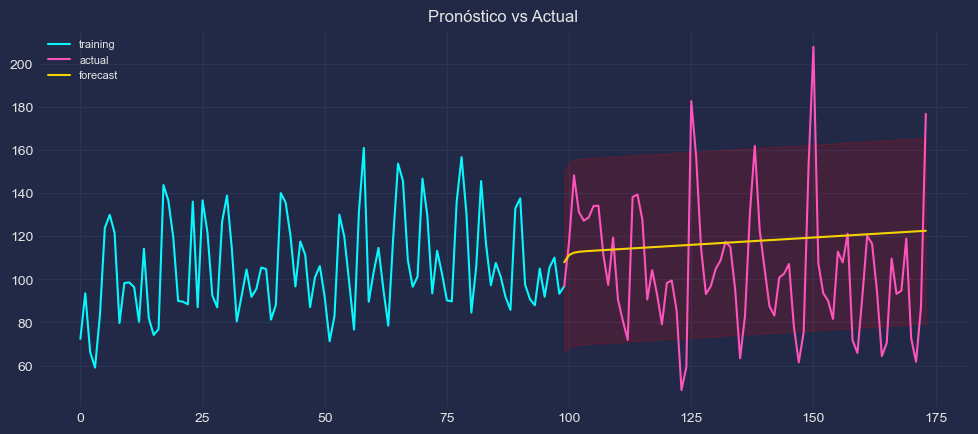

In [521]:
# Modelo de Entrenamiento
# model = ARIMA(entrenamiento, order=(3,2,1))  
modelo_train = ARIMA(entrenamiento, order=(1, 1, 1))  
fitted = modelo_train.fit(disp=-1)  

# Pronóstico
fc, se, conf = fitted.forecast(75, alpha=0.05)  # 95% conf

# Creando Series con Pandas
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(entrenamiento, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='r', alpha=.15)
plt.title('Pronóstico vs Actual')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [445]:
# Construcción del Modelos
model = ARIMA(entrenamiento, order=(1, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(75, alpha=0.05)  # 95% conf

# Creando Series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)



                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   99
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -440.015
Method:                       css-mle   S.D. of innovations             20.182
Date:                Sat, 11 Sep 2021   AIC                            890.031
Time:                        15:47:56   BIC                            903.006
Sample:                             1   HQIC                           895.281
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1384      0.098      1.411      0.158      -0.054       0.331
ar.L1.D.value    -0.0378      0.159     -0.239      0.811      -0.349       0.273
ma.L1.D.value    -0.5313      0.124     

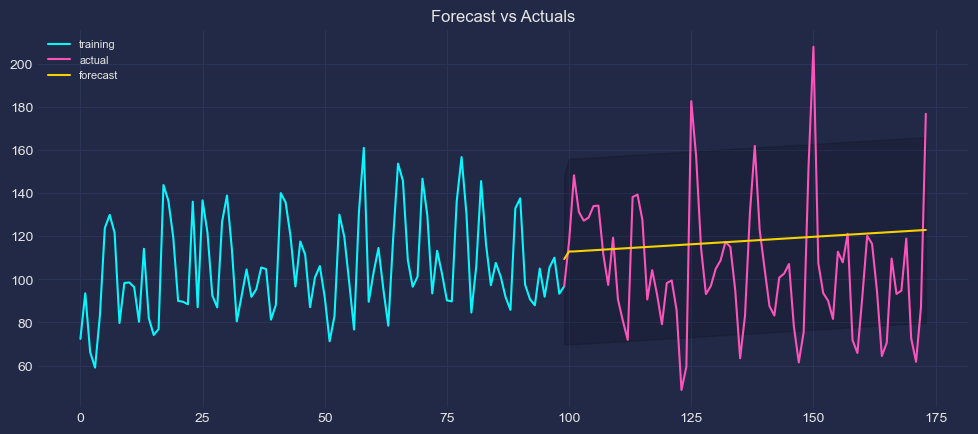

In [446]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(entrenamiento, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Para el modelo (1,1,2) vemos que se aleja del pronostico . 

Por lo tanto el modelo ARIMA (1,1,1) parece dar un pronóstico direccionalmente correcto. 
Y los valores reales observados se encuentran dentro de la banda de confianza del 95%. 
Eso parece estar bien.

In [ ]:
##############  MODELO  SARIMA ###########################################3

In [469]:
#importando bibliotecas y módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import requests
import time
from io import StringIO
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
# Una mejor vizualización de los datos
import mplcyberpunk
plt.style.use("cyberpunk")
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [555]:
#Importando los datos y colocando la columna de fecha como índice. Entonces, ya tenemos una serie
url = "https://estadisticas.bcrp.gob.pe/estadisticas/series/api/PN01791AM/csv/2007-01/2021-06"
content = requests.get(url,verify=False).text.replace("<br>","\n").strip()
csv =  StringIO(content)
serie_final = pd.read_csv(csv)
serie_final
serie_final.columns = ['date', 'value']
serie_final


,date,value
0,Ene.2007,72.384329
1,Feb.2007,93.525770
2,Mar.2007,66.258969
3,Abr.2007,59.029558
4,May.2007,83.383422
...,...,...
169,Feb.2021,118.919699
170,Mar.2021,72.607093
171,Abr.2021,61.752598
172,May.2021,86.955658


<AxesSubplot:>

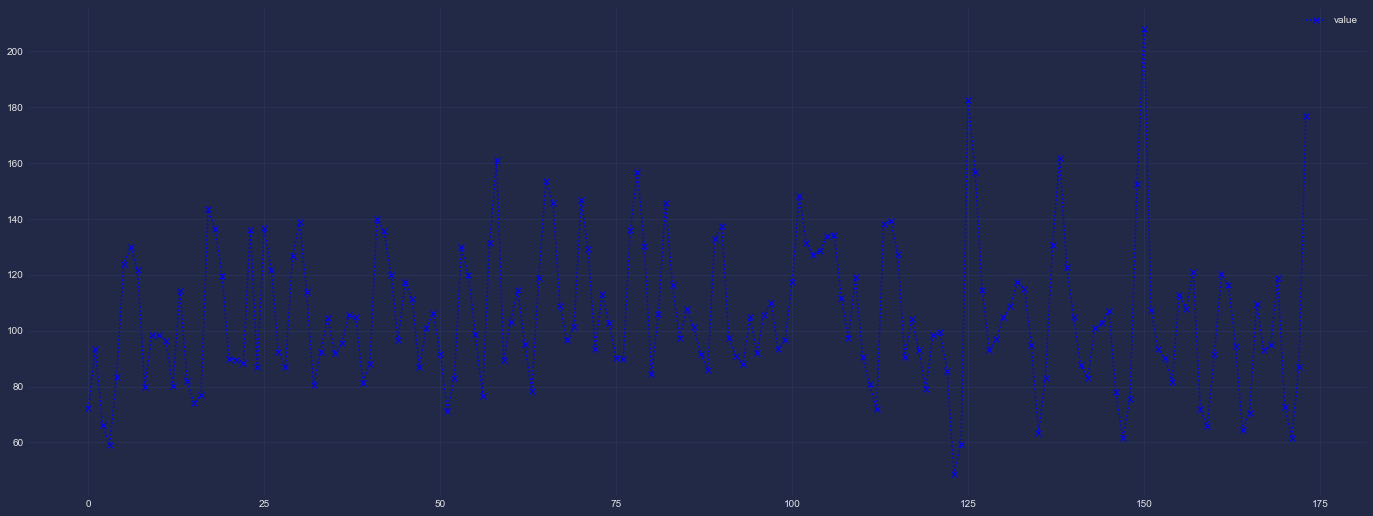

In [556]:
serie_final.plot(figsize=(24,9), c='b', marker='x', linestyle=':')


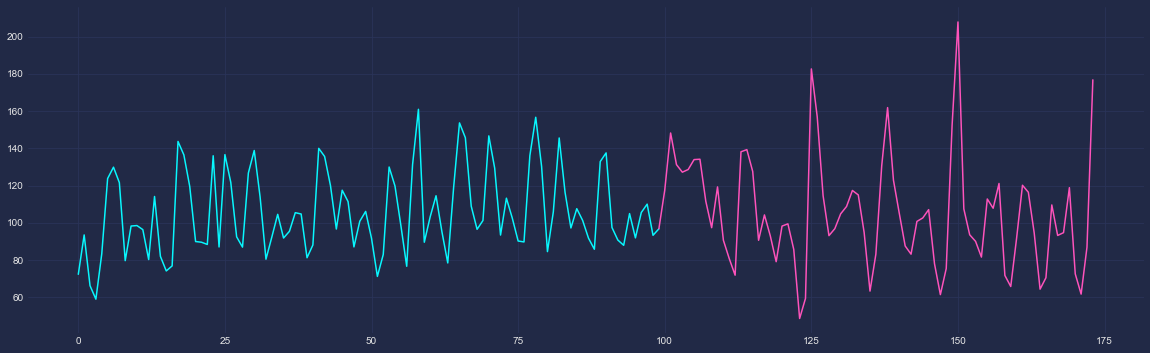

In [557]:
#Cómo encontrar el modelo ARIMA óptimo manualmente usando la validación cruzada fuera de tiempo
# Creando la serie de Entrenamiento y Test
# n = int(len(df.value) * 2/3)
# train = df.value[:n]
# test = df.value[n:]

serie_entrenamiento = serie_final.value[:100]
serie_test = serie_final.value[99:]
plt.figure(figsize=(20, 6))
plt.plot(serie_entrenamiento )
plt.plot(serie_test)


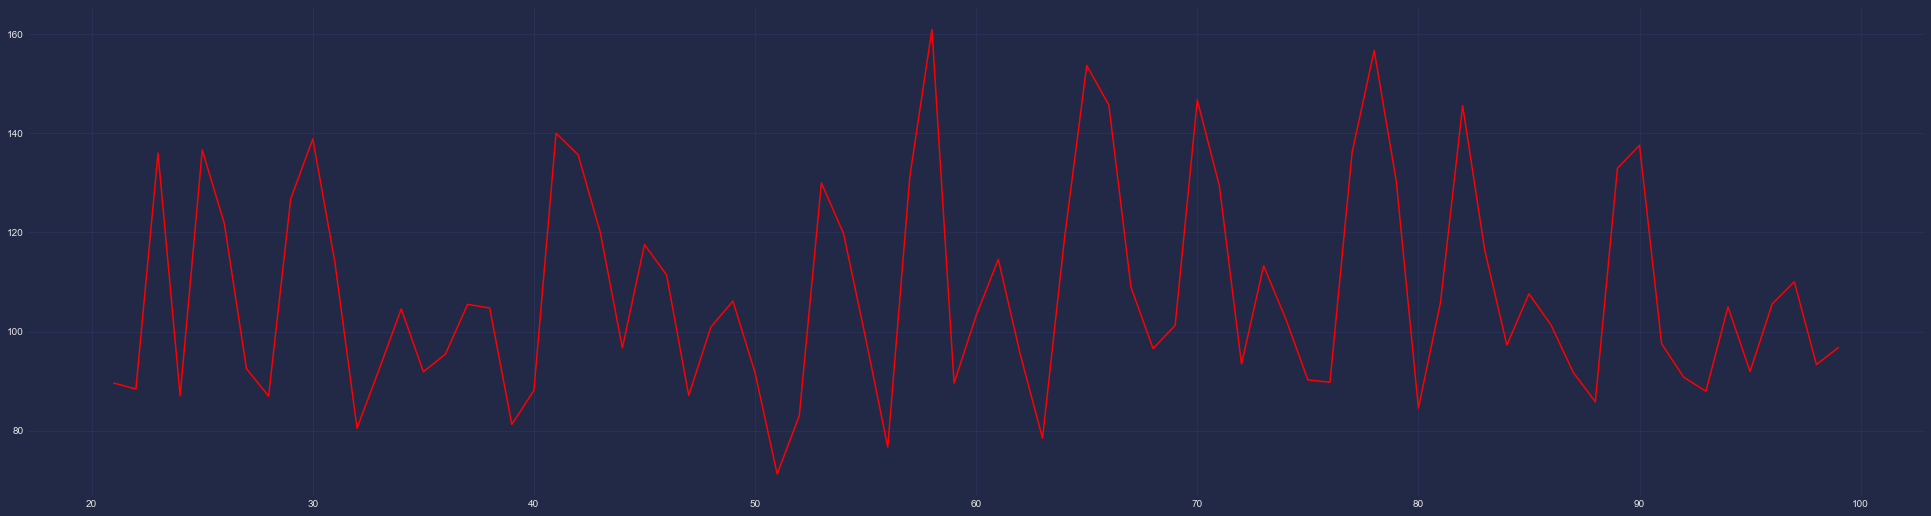

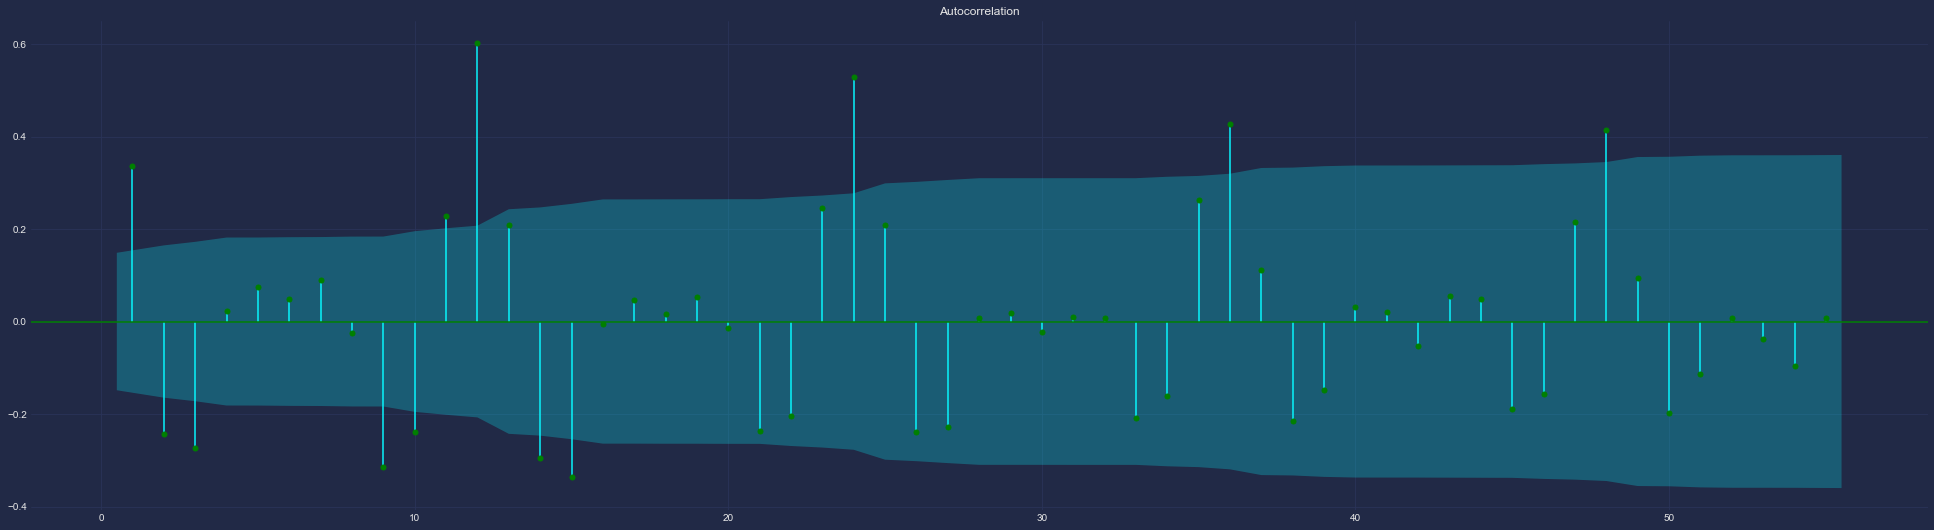

In [559]:
#3. Estacionalidad
serie_entrenamiento.loc['2000':].plot(c='r',figsize=(34, 9))
#Graficando el ACF:
fig, ax1 = plt.subplots(figsize=(34, 9))
plot_acf(serie_final.value, lags=55, zero=False,  ax=ax1, color='GREEN')
plt.show()



In [560]:
#4. Estacionariedad
#Antes de continuar con nuestro modelado, necesitamos estudiar la estacionariedad de la serie, 
#que es una suposición del modelo ARIMA que pretendemos utilizar.
#test ADF
resultado_serie = adfuller(serie_final.value)
#p-valor:
print('p-valor: ', resultado_serie[1])

p-valor:  0.0072002896864272106


In [564]:
#Test ADF
resultado_adf = adfuller(serie_final.value)
#P-valor:
print('p-valor: ', resultado_adf[1])

#A partir del gráfico, la serie de diferencias de rezago de 12 meses parece ser estacionaria. 
#El valor es significativo . 
#Por lo tanto es estacionaria 

p-valor:  0.0072002896864272106


In [565]:
#Modelado
#Antes de ejecutar esta sentencia, verificar que su computadora tenga mínimo 16 
import pmdarima as pm

#Entrenando diferentes modelos y manteniendo el AIC más pequeño
#Testeamos valores entre 0 y 3 para cada orden del modelo.
modelo_optimo = pm.auto_arima(serie_entrenamiento,
                      seasonal=True, m=12,
                      d=0, D=1,
                      start_p=0, start_q=0, start_P=0, start_Q=0,
                      max_p=3, max_q=3, max_P=3, max_Q=3,
                      max_order=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True)
print(modelo_optimo.summary())  

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=759.945, Time=0.30 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=749.378, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=739.917, Time=0.46 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=758.400, Time=0.04 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=756.852, Time=0.15 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=749.421, Time=0.39 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=inf, Time=2.46 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=741.331, Time=0.53 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=741.576, Time=0.76 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=739.442, Time=0.50 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=756.691, Time=0.17 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, T

In [ ]:
El modelo óptimo, entre los buscados, es el SARIMA ARIMA(1,0,0)(0,1,1)[12]. Así, la parte no estacional 
tiene órdenes (p, d, q) = (1,0,0) y la parte estacional tiene órdenes (P, D, Q) S = (0,1,1) 12.

A continuación, entrenamos este gran modelo usando la biblioteca statsmodels.

In [566]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
modelo_optimo = SARIMAX(serie_entrenamiento, order=(1,0,0), trend='c', seasonal_order=(0,1,1,12))
resultados_finales = modelo_optimo.fit()
print(resultados_finales.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                value   No. Observations:                  100
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -365.721
Date:                              Sat, 11 Sep 2021   AIC                            739.442
Time:                                      20:30:17   BIC                            749.351
Sample:                                           0   HQIC                           743.434
                                              - 100                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2885      0.799      1.613      0.107      -0.277       2.854
ar.L1          0.25

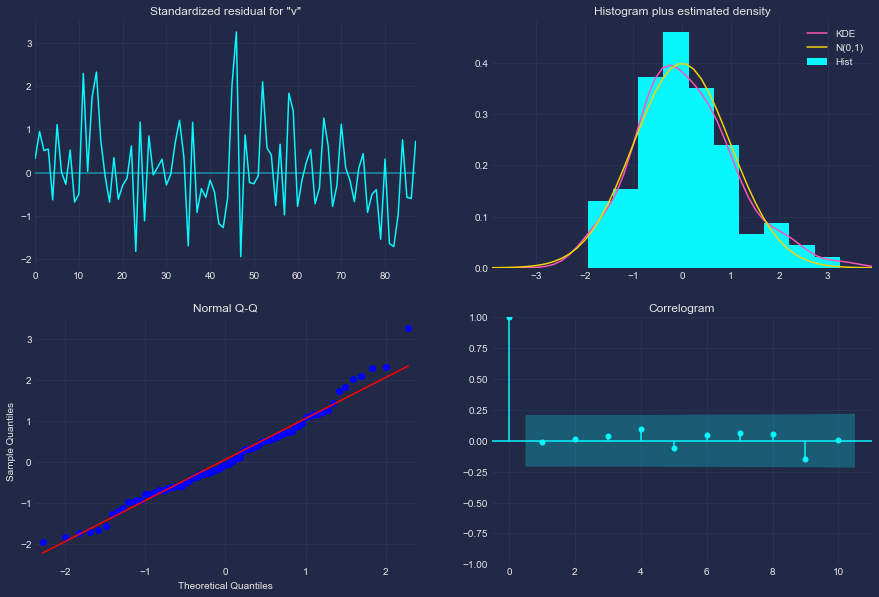

In [567]:
resultados_finales.plot_diagnostics(figsize=(15,10))
plt.show()

In [ ]:
#################### ES SIGNIFICATIVO : LOS RESIDUOS PRESENTAN UN COMPORTAMIENTO NORMAL ##############################

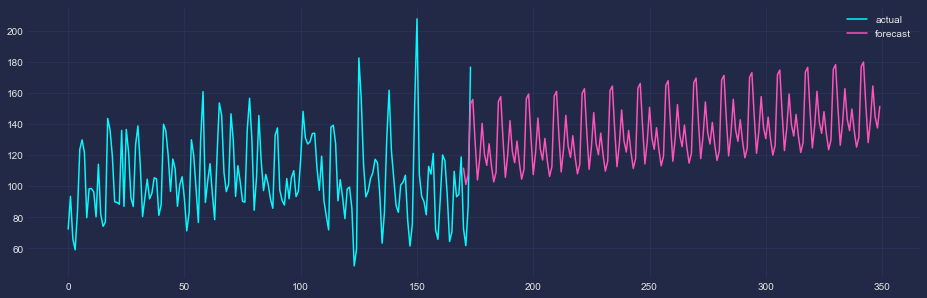

In [591]:
#Pronóstico fuera de la muestra utilizando el conjunto de prueba (puntos nunca vistos por el modelo):
forecast = resultados_finales.predict(start=(len(serie_entrenamiento)+len(serie_entrenamiento)-30), end=(len(serie_entrenamiento)+len(serie_entrenamiento)-1+150))
forecast.name = 'forecast'
# print(forecast)
#Graficando lo valores
grafico_final  = pd.concat([serie_final.rename(columns={'value': 'actual'}), forecast], axis=1)
grafico_final .loc[:].plot(figsize=(16,5))
plt.show()

In [ ]:
# El modelo óptimo, entre los buscados, es el SARIMA ARIMA(1,0,0)(0,1,1)[12]. Así, la parte no estacional 
#tiene órdenes (p, d, q) = (1,0,0) y la parte estacional tiene órdenes (P, D, Q) S = (0,1,1) 12.

#Para esta serie el modelo SARIMA , es el mejor predictor. Al ser la serie estacionaria. 

### 4. Extracción de Información
La información histórica del Tipo de Cambio de Euro esta en la página de la SBS ```https://www.sbs.gob.pe/app/stats/tc-cv-historico.asp``` consultar y descargar la información desde 08/02/1999 hasta el presente. Buscar los mecanismos para obtener la dicha información y realizar un gráfico de medias móviles mensuales para la compra y venta. En los días donde falte el dato del tipo de cambio de compra y venta completar con el tipo de cambio promedio de dicho mes.

In [54]:
# import libraries
import requests
from bs4 import BeautifulSoup as b 
import csv
from datetime import datetime

In [56]:
# indicar la ruta
url = 'https://www.sbs.gob.pe/app/stats/tc-cv-historico.asp'

html =requests.get(url)
content =html.content
soup =b(content , "lxml")
print(soup)


<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Aplicaciones</title>
<script data-dtconfig="rid=RID_-408490742|rpid=-1798117629|domain=sbs.gob.pe|reportUrl=/app/rb_7c49b89f-c286-4ad7-877d-66f0000d22c6|app=a7babc1dd8d57c64|rcdec=1209600000|featureHash=ICA27SVfjqrux|vcv=2|rdnt=1|uxrgce=1|bp=2|srmcrv=10|cuc=5ztdwal4|mel=100000|dpvc=1|ssv=4|lastModification=1631084919522|dtVersion=10223210811140219|srmcrl=1|tp=500,50,0,1|uxdcw=1500|vs=2|agentUri=/app/ruxitagentjs_ICA27SVfjqrux_10223210811140219.js" src="/app/ruxitagentjs_ICA27SVfjqrux_10223210811140219.js" type="text/javascript"></script><link href="../plantillas/estilos/aplicaciones.css" rel="stylesheet" type="text/css"/>
<link href="estilos/MEN01.css" rel="stylesheet"/>
<link href="/RepositorioAPS/estilos/0/0/WEB.css" rel="stylesheet" type=

In [65]:
# Obtenemos la tabla 
fila_1 = soup.find('td',{'APLI_txtFecha'})
fila_1

<td class="APLI_txtFecha" width="151">
<div class="APLI_botonCalendario" id="FCH_FECHA_BOTON_1" title="Hacer clic para ver calendario"></div>
<script type="text/javascript">
				Calendar.setup({
				inputField    : "FECHA_CONSULTA_1",
				button        : "FCH_FECHA_BOTON_1",
				ifFormat      : "%d/%m/%Y"
				});
			                          </script>
 (dd/mm/aaaa)</td>

In [58]:
name=""
price=""
nroFila=2
for fila in tabla.find_all("tr"):
    if nroFila==1:
        nroCelda=0
        for celda in fila.find_all('td'):
            if nroCelda==0:
                name=celda.text
                print("Indice:", name)
            if nroCelda==2:
                price=celda.text
                print("Valor:", price)
            nroCelda=nroCelda+1
    nroFila=nroFila+1